In [1]:
import pandas as pd
import numpy as np
import gc
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gc
sns.set(style="whitegrid")

In [2]:
data = pd.read_csv("eeg_data.csv")

In [3]:
eeg_data_columns = data.columns.values.tolist()

In [4]:
print(data["label"].value_counts())
cleanup_rules = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
eeg_data_encoded = data.replace(cleanup_rules, inplace=False)
print(eeg_data_encoded['label'].value_counts())

label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64
label
0    716
2    708
1    708
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

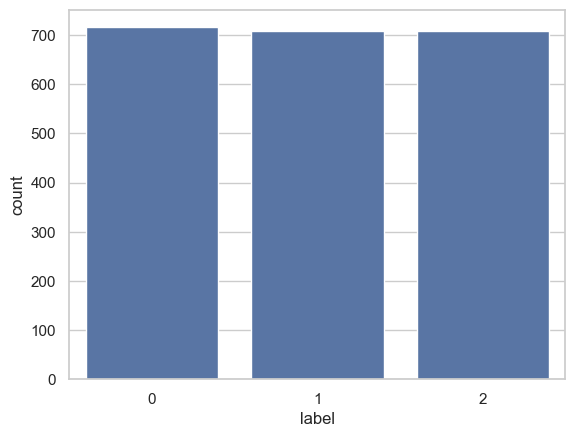

In [5]:
import seaborn as sns
sns.countplot(x=eeg_data_encoded['label'], data=data)

In [6]:
data.count()

# mean_0_a    2132
mean_1_a      2132
mean_2_a      2132
mean_3_a      2132
mean_4_a      2132
              ... 
fft_746_b     2132
fft_747_b     2132
fft_748_b     2132
fft_749_b     2132
label         2132
Length: 2549, dtype: int64

In [7]:
eeg_data_encoded['label'].unique()

array([2, 0, 1], dtype=int64)

In [8]:
eeg_data_encoded.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,2
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,0
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,1
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,1
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,0


In [9]:
x=eeg_data_encoded.drop(["label"]  ,axis=1)
x.shape

(2132, 2548)

In [10]:
y = eeg_data_encoded.loc[:,'label'].values
y.shape

(2132,)

In [11]:
import pandas as pd
print("DataFrame Information:")
print(eeg_data_encoded.info())
print("\nFirst few rows of the DataFrame:")
print(eeg_data_encoded.head())
print("\nDataFrame Description:")
print(eeg_data_encoded.describe())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), int64(1)
memory usage: 41.5 MB
None

First few rows of the DataFrame:
   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ... 

# Pearson Correlation

In [12]:
feature_name = x.columns.tolist()
def cor_selector(x, y):
    cor_list = []
    for i in x.columns.tolist():
        cor = np.corrcoef(x[i], y)[0, 1]
        cor_list.append(cor)
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    cor_feature = x.iloc[:,np.argsort(np.abs(cor_list))[-100:]].columns.tolist()
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [13]:
cor_support, cor_feature = cor_selector(x, y)
print(str(len(cor_feature)), 'selected features')

100 selected features


In [14]:
cor_feature

['fft_319_a',
 'fft_316_a',
 'fft_480_b',
 'fft_480_a',
 'fft_694_a',
 'fft_691_a',
 'fft_364_a',
 'fft_361_a',
 'fft_105_b',
 'fft_375_b',
 'fft_49_a',
 'fft_46_a',
 'fft_675_b',
 'fft_105_a',
 'fft_735_b',
 'fft_375_a',
 'eigen_0_b',
 'fft_300_b',
 'fft_690_b',
 'fft_735_a',
 'eigen_0_a',
 'fft_675_a',
 'fft_315_b',
 'fft_360_b',
 'fft_300_a',
 'fft_690_a',
 'fft_315_a',
 'fft_360_a',
 'fft_406_b',
 'fft_409_b',
 'fft_4_a',
 'fft_1_a',
 'fft_4_b',
 'fft_1_b',
 'fft_406_a',
 'fft_409_a',
 'fft_34_b',
 'fft_31_b',
 'fft_31_a',
 'fft_34_a',
 'logm_24_b',
 'fft_405_b',
 'logm_24_a',
 'fft_75_a',
 'fft_75_b',
 'fft_405_a',
 'fft_450_b',
 'fft_450_a',
 'fft_390_b',
 'fft_465_b',
 'fft_15_b',
 'fft_420_b',
 'fft_30_a',
 'fft_30_b',
 'fft_15_a',
 'fft_90_b',
 'fft_390_a',
 'fft_465_a',
 'fft_45_b',
 'fft_90_a',
 'fft_420_a',
 'fft_45_a',
 'fft_0_a',
 'fft_0_b',
 'covmat_117_b',
 'covmat_117_a',
 'mean_d_17_b',
 'mean_d_7_b',
 'mean_d_17_a',
 'mean_d_7_a',
 'mean_d_12_b',
 'mean_d_12_a',
 'me

In [15]:
from sklearn.model_selection import train_test_split
x_cor_feature=data[cor_feature]
x_cor_train, x_cor_test, y_cor_train, y_cor_test = train_test_split(x_cor_feature, y, test_size = 0.2)

# Chi-Squared

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(x)
chi_selector = SelectKBest(chi2, k=100)
chi_selector.fit(X_norm, y)

SelectKBest(k=100, score_func=<function chi2 at 0x000002376C29ACA0>)

In [17]:
chi_support = chi_selector.get_support()
chi_feature = x.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

100 selected features


In [18]:
chi_feature

['mean_2_a',
 'mean_d_2_a2',
 'mean_d_12_a',
 'stddev_2_a',
 'stddev_3_a',
 'min_2_a',
 'min_q_2_a',
 'min_q_7_a',
 'min_q_12_a',
 'min_q_17_a',
 'covmat_0_a',
 'covmat_13_a',
 'covmat_52_a',
 'covmat_104_a',
 'covmat_117_a',
 'eigen_0_a',
 'eigen_1_a',
 'logm_0_a',
 'logm_1_a',
 'entropy0_a',
 'entropy2_a',
 'entropy3_a',
 'fft_0_a',
 'fft_1_a',
 'fft_4_a',
 'fft_15_a',
 'fft_30_a',
 'fft_31_a',
 'fft_34_a',
 'fft_36_a',
 'fft_39_a',
 'fft_45_a',
 'fft_46_a',
 'fft_49_a',
 'fft_75_a',
 'fft_90_a',
 'fft_285_a',
 'fft_375_a',
 'fft_390_a',
 'fft_405_a',
 'fft_406_a',
 'fft_409_a',
 'fft_411_a',
 'fft_414_a',
 'fft_420_a',
 'fft_421_a',
 'fft_424_a',
 'fft_450_a',
 'fft_465_a',
 'fft_660_a',
 'mean_2_b',
 'mean_d_2_b2',
 'mean_d_12_b',
 'stddev_2_b',
 'stddev_3_b',
 'min_2_b',
 'min_q_2_b',
 'min_q_7_b',
 'min_q_12_b',
 'min_q_17_b',
 'covmat_0_b',
 'covmat_13_b',
 'covmat_52_b',
 'covmat_104_b',
 'covmat_117_b',
 'eigen_0_b',
 'eigen_1_b',
 'logm_0_b',
 'logm_1_b',
 'entropy0_b',
 'ent

In [19]:
from sklearn.model_selection import train_test_split
x_chi_feature=data[chi_feature]
x_chi_train, x_chi_test, y_chi_train, y_chi_test = train_test_split(x_chi_feature, y, test_size = 0.2)

# Recursive Feature Elimination

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=100, step=10, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 2548 features.
Fitting estimator with 2538 features.
Fitting estimator with 2528 features.
Fitting estimator with 2518 features.
Fitting estimator with 2508 features.
Fitting estimator with 2498 features.
Fitting estimator with 2488 features.
Fitting estimator with 2478 features.
Fitting estimator with 2468 features.
Fitting estimator with 2458 features.
Fitting estimator with 2448 features.
Fitting estimator with 2438 features.
Fitting estimator with 2428 features.
Fitting estimator with 2418 features.
Fitting estimator with 2408 features.
Fitting estimator with 2398 features.
Fitting estimator with 2388 features.
Fitting estimator with 2378 features.
Fitting estimator with 2368 features.
Fitting estimator with 2358 features.
Fitting estimator with 2348 features.
Fitting estimator with 2338 features.
Fitting estimator with 2328 features.
Fitting estimator with 2318 features.
Fitting estimator with 2308 features.
Fitting estimator with 2298 features.
Fitting esti

RFE(estimator=LogisticRegression(), n_features_to_select=100, step=10,
    verbose=5)

In [21]:
rfe_support = rfe_selector.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

100 selected features


In [22]:
rfe_feature

['# mean_0_a',
 'mean_1_a',
 'mean_3_a',
 'mean_d_0_a2',
 'mean_d_8_a',
 'stddev_2_a',
 'stddev_3_a',
 'max_4_a',
 'max_q_1_a',
 'max_q_3_a',
 'max_q_7_a',
 'max_q_8_a',
 'max_q_11_a',
 'max_q_13_a',
 'max_q_18_a',
 'min_1_a',
 'min_2_a',
 'min_q_2_a',
 'min_q_3_a',
 'min_q_5_a',
 'min_q_7_a',
 'min_q_8_a',
 'min_q_13_a',
 'covmat_0_a',
 'covmat_20_a',
 'covmat_97_a',
 'covmat_104_a',
 'logm_0_a',
 'logm_1_a',
 'logm_2_a',
 'logm_4_a',
 'logm_6_a',
 'logm_7_a',
 'logm_8_a',
 'logm_9_a',
 'logm_10_a',
 'logm_11_a',
 'logm_14_a',
 'logm_24_a',
 'logm_42_a',
 'logm_45_a',
 'logm_64_a',
 'entropy0_a',
 'entropy3_a',
 'fft_30_a',
 'fft_77_a',
 'fft_120_a',
 'fft_130_a',
 'fft_206_a',
 'fft_209_a',
 'fft_315_a',
 'mean_0_b',
 'mean_1_b',
 'mean_3_b',
 'mean_d_10_b',
 'stddev_2_b',
 'stddev_3_b',
 'max_4_b',
 'max_q_1_b',
 'max_q_3_b',
 'max_q_8_b',
 'max_q_11_b',
 'max_q_13_b',
 'max_q_18_b',
 'min_1_b',
 'min_2_b',
 'min_3_b',
 'min_q_3_b',
 'min_q_13_b',
 'min_q_15_b',
 'min_q_17_b',
 'min

In [23]:
from sklearn.model_selection import train_test_split
x_rfe_feature=data[rfe_feature]
x_rfe_train, x_rfe_test, y_rfe_train, y_rfe_test = train_test_split(x_rfe_feature, y, test_size = 0.2)

# SelectFromModel - Logistic Regression

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), threshold='1.25*median')

embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(), threshold='1.25*median')

In [25]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = x.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

895 selected features


In [26]:
embeded_lr_feature

['# mean_0_a',
 'mean_1_a',
 'mean_3_a',
 'mean_4_a',
 'mean_d_0_a2',
 'mean_d_3_a2',
 'mean_d_5_a',
 'mean_d_8_a',
 'mean_d_9_a',
 'mean_d_10_a',
 'mean_d_13_a',
 'mean_d_15_a',
 'mean_d_18_a',
 'stddev_0_a',
 'stddev_1_a',
 'stddev_2_a',
 'stddev_3_a',
 'max_1_a',
 'max_2_a',
 'max_3_a',
 'max_4_a',
 'max_q_1_a',
 'max_q_2_a',
 'max_q_3_a',
 'max_q_4_a',
 'max_q_6_a',
 'max_q_7_a',
 'max_q_8_a',
 'max_q_9_a',
 'max_q_11_a',
 'max_q_12_a',
 'max_q_13_a',
 'max_q_14_a',
 'max_q_16_a',
 'max_q_17_a',
 'max_q_18_a',
 'max_q_22_a',
 'max_q_24_a',
 'max_q_47_a',
 'max_q_48_a',
 'min_0_a',
 'min_1_a',
 'min_2_a',
 'min_3_a',
 'min_4_a',
 'min_d_0_a',
 'min_d_3_a',
 'min_q_0_a',
 'min_q_1_a',
 'min_q_2_a',
 'min_q_3_a',
 'min_q_5_a',
 'min_q_6_a',
 'min_q_7_a',
 'min_q_8_a',
 'min_q_10_a',
 'min_q_11_a',
 'min_q_12_a',
 'min_q_13_a',
 'min_q_15_a',
 'min_q_16_a',
 'min_q_17_a',
 'min_q_18_a',
 'min_q_37_a',
 'covmat_0_a',
 'covmat_1_a',
 'covmat_5_a',
 'covmat_7_a',
 'covmat_8_a',
 'covmat_9

In [27]:
from sklearn.model_selection import train_test_split
x_embeded_lr_feature=data[embeded_lr_feature]
x_lr_train, x_lr_test, y_lr_train, y_lr_test = train_test_split(x_embeded_lr_feature, y, test_size = 0.2)

# SelectFromModel - RandomForest

In [28]:
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(x, y)

SelectFromModel(estimator=RandomForestClassifier(), threshold='1.25*median')

In [29]:
from sklearn.feature_selection import SelectFromModel
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = x.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

1113 selected features


In [30]:
embeded_rf_feature

['# mean_0_a',
 'mean_1_a',
 'mean_2_a',
 'mean_3_a',
 'mean_4_a',
 'mean_d_0_a',
 'mean_d_3_a',
 'mean_d_0_a2',
 'mean_d_1_a2',
 'mean_d_2_a2',
 'mean_d_3_a2',
 'mean_d_5_a',
 'mean_d_6_a',
 'mean_d_7_a',
 'mean_d_8_a',
 'mean_d_9_a',
 'mean_d_10_a',
 'mean_d_11_a',
 'mean_d_12_a',
 'mean_d_13_a',
 'mean_d_14_a',
 'mean_d_15_a',
 'mean_d_16_a',
 'mean_d_17_a',
 'mean_d_18_a',
 'mean_d_19_a',
 'mean_d_20_a',
 'mean_d_21_a',
 'mean_d_22_a',
 'mean_d_24_a',
 'mean_d_25_a',
 'mean_d_26_a',
 'mean_d_28_a',
 'mean_d_32_a',
 'mean_d_33_a',
 'mean_d_36_a',
 'mean_d_37_a',
 'mean_d_40_a',
 'mean_d_42_a',
 'mean_d_43_a',
 'mean_d_48_a',
 'stddev_0_a',
 'stddev_1_a',
 'stddev_2_a',
 'stddev_3_a',
 'stddev_d_0_a',
 'stddev_d_2_a',
 'moments_0_a',
 'moments_1_a',
 'moments_2_a',
 'moments_4_a',
 'moments_5_a',
 'moments_6_a',
 'moments_7_a',
 'moments_8_a',
 'moments_9_a',
 'moments_10_a',
 'moments_12_a',
 'moments_13_a',
 'moments_15_a',
 'moments_16_a',
 'moments_17_a',
 'moments_18_a',
 'max_0

In [31]:
from sklearn.model_selection import train_test_split
x_embeded_rf_feature=data[embeded_rf_feature]
x_rf_train, x_rf_test, y_rf_train, y_rf_test = train_test_split(x_embeded_rf_feature, y, test_size = 0.2)

# SelectFromModel - LGBM

In [32]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(x, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 646030
[LightGBM] [Info] Number of data points in the train set: 2132, number of used features: 2546
[LightGBM] [Info] Start training from score -1.091136
[LightGBM] [Info] Start training from score -1.102372
[LightGBM] [Info] Start training from score -1.102372
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

SelectFromModel(estimator=LGBMClassifier(colsample_bytree=0.2,
                                         learning_rate=0.05,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         num_leaves=32, reg_alpha=3,
                                         reg_lambda=1),
                threshold='1.25*median')

In [33]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = x.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

2548 selected features


In [34]:
embeded_lgb_feature

['# mean_0_a',
 'mean_1_a',
 'mean_2_a',
 'mean_3_a',
 'mean_4_a',
 'mean_d_0_a',
 'mean_d_1_a',
 'mean_d_2_a',
 'mean_d_3_a',
 'mean_d_4_a',
 'mean_d_0_a2',
 'mean_d_1_a2',
 'mean_d_2_a2',
 'mean_d_3_a2',
 'mean_d_4_a2',
 'mean_d_5_a',
 'mean_d_6_a',
 'mean_d_7_a',
 'mean_d_8_a',
 'mean_d_9_a',
 'mean_d_10_a',
 'mean_d_11_a',
 'mean_d_12_a',
 'mean_d_13_a',
 'mean_d_14_a',
 'mean_d_15_a',
 'mean_d_16_a',
 'mean_d_17_a',
 'mean_d_18_a',
 'mean_d_19_a',
 'mean_d_20_a',
 'mean_d_21_a',
 'mean_d_22_a',
 'mean_d_23_a',
 'mean_d_24_a',
 'mean_d_25_a',
 'mean_d_26_a',
 'mean_d_27_a',
 'mean_d_28_a',
 'mean_d_29_a',
 'mean_d_30_a',
 'mean_d_31_a',
 'mean_d_32_a',
 'mean_d_33_a',
 'mean_d_34_a',
 'mean_d_35_a',
 'mean_d_36_a',
 'mean_d_37_a',
 'mean_d_38_a',
 'mean_d_39_a',
 'mean_d_40_a',
 'mean_d_41_a',
 'mean_d_42_a',
 'mean_d_43_a',
 'mean_d_44_a',
 'mean_d_45_a',
 'mean_d_46_a',
 'mean_d_47_a',
 'mean_d_48_a',
 'mean_d_49_a',
 'stddev_0_a',
 'stddev_1_a',
 'stddev_2_a',
 'stddev_3_a',
 's

In [35]:
from sklearn.model_selection import train_test_split
x_embeded_lgb_feature=data[embeded_lgb_feature]
x_lgb_train, x_lgb_test, y_lgb_train, y_lgb_test = train_test_split(x_embeded_lgb_feature, y, test_size = 0.2)

# KNN - Pearson Correlation

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_corr = KNeighborsClassifier(n_neighbors=3)
knn_corr.fit(x_cor_train, y_cor_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
mean_accuracy=knn_corr.score(x_cor_test, y_cor_test)
y_pred = knn_corr.predict(x_cor_test)
print(mean_accuracy)

0.8477751756440282


In [38]:
y_pred

array([2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 2,
       1, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 2,
       2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2,
       2, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0,
       2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2,
       2, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2,
       1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 2,
       1, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0,

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_cor_test,y_pred))
print(classification_report(y_cor_test,y_pred))

[[135  10   0]
 [ 18  90  27]
 [  0  10 137]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       145
           1       0.82      0.67      0.73       135
           2       0.84      0.93      0.88       147

    accuracy                           0.85       427
   macro avg       0.85      0.84      0.84       427
weighted avg       0.85      0.85      0.84       427



In [40]:
print ("Training Accuracy {}".format(knn_corr.score(x_cor_train, y_cor_train)))
print ("Testing Accuracy {}".format(knn_corr.score(x_cor_test, y_cor_test)))

Training Accuracy 0.9038123167155425
Testing Accuracy 0.8477751756440282


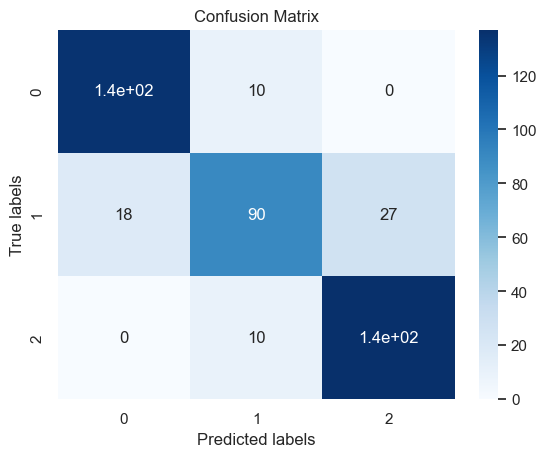

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_cor_test, knn_corr.predict(x_cor_test))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Decision Tree - Pearson Correlation

In [42]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_corr = DecisionTreeClassifier(random_state=0)
decisiontree_corr.fit(x_cor_train, y_cor_train)

DecisionTreeClassifier(random_state=0)

In [43]:
mean_accuracy=decisiontree_corr.score(x_cor_test, y_cor_test)
y_pred = decisiontree_corr.predict(x_cor_test)
print(mean_accuracy)

0.9039812646370023


In [44]:
y_pred

array([2, 2, 1, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2, 0, 1,
       1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1,
       1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 2,
       2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2,
       2, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0,
       2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1, 0,
       2, 0, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 1, 2,
       2, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1,
       1, 0, 1, 0, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1,
       1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 0,
       1, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 0,
       2, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0,

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_cor_test,y_pred))
print(classification_report(y_cor_test,y_pred))

[[136   9   0]
 [  7 112  16]
 [  0   9 138]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       145
           1       0.86      0.83      0.85       135
           2       0.90      0.94      0.92       147

    accuracy                           0.90       427
   macro avg       0.90      0.90      0.90       427
weighted avg       0.90      0.90      0.90       427



In [46]:
print ("Training Accuracy {}".format(decisiontree_corr.score(x_cor_train, y_cor_train)))
print ("Testing Accuracy {}".format(decisiontree_corr.score(x_cor_test, y_cor_test)))

Training Accuracy 1.0
Testing Accuracy 0.9039812646370023


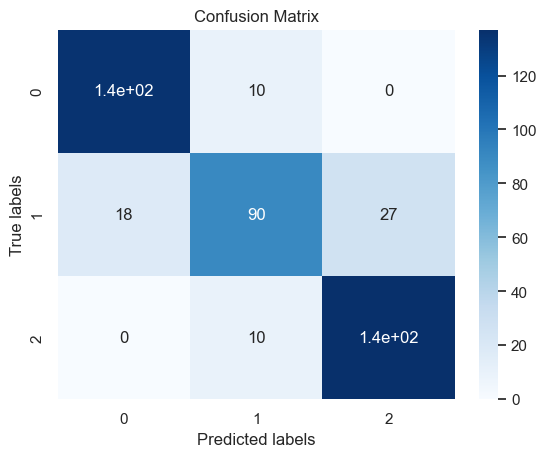

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_cor_test, knn_corr.predict(x_cor_test))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Random Forest - Pearson Correlation

In [48]:
from sklearn.ensemble import RandomForestClassifier
randomforest_corr = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
randomforest_corr.fit(x_cor_train, y_cor_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [49]:
mean_accuracy=randomforest_corr.score(x_cor_test, y_cor_test)
y_pred = randomforest_corr.predict(x_cor_test)
print(mean_accuracy)

0.8899297423887588


In [50]:
y_pred

array([2, 2, 1, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2,
       1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1,
       1, 2, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 2,
       2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2,
       2, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0,
       2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1, 0,
       2, 0, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2,
       2, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1,
       1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0,
       2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2,
       1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0,

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_cor_test,y_pred))
print(classification_report(y_cor_test,y_pred))

[[140   5   0]
 [  9  95  31]
 [  0   2 145]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       145
           1       0.93      0.70      0.80       135
           2       0.82      0.99      0.90       147

    accuracy                           0.89       427
   macro avg       0.90      0.89      0.88       427
weighted avg       0.90      0.89      0.89       427



In [52]:
print ("Training Accuracy {}".format(randomforest_corr.score(x_cor_train, y_cor_train)))
print ("Testing Accuracy {}".format(randomforest_corr.score(x_cor_test, y_cor_test)))

Training Accuracy 0.9102639296187683
Testing Accuracy 0.8899297423887588


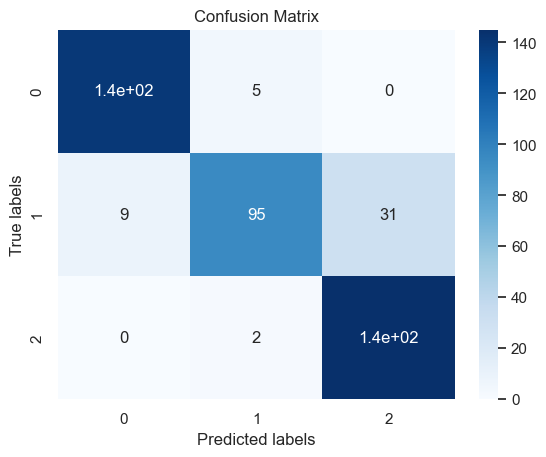

In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_cor_test, randomforest_corr.predict(x_cor_test))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Gaussian Naive Bayes - Pearson Correlation

In [54]:
from sklearn.naive_bayes import GaussianNB
gaussian_corr = GaussianNB()
gaussian_corr.fit(x_cor_train, y_cor_train)

GaussianNB()

In [55]:
mean_accuracy=gaussian_corr.score(x_cor_test, y_cor_test)
y_pred = gaussian_corr.predict(x_cor_test)
print(mean_accuracy)

0.6791569086651054


In [56]:
y_pred

array([2, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1,
       0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 1,
       1, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2,
       2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0,
       1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2,
       2, 1, 0, 1, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2,
       1, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0,

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_cor_test,y_pred))
print(classification_report(y_cor_test,y_pred))

[[138   7   0]
 [ 67  42  26]
 [  0  37 110]]
              precision    recall  f1-score   support

           0       0.67      0.95      0.79       145
           1       0.49      0.31      0.38       135
           2       0.81      0.75      0.78       147

    accuracy                           0.68       427
   macro avg       0.66      0.67      0.65       427
weighted avg       0.66      0.68      0.66       427



In [58]:
print ("Training Accuracy {}".format(gaussian_corr.score(x_cor_train, y_cor_train)))
print ("Testing Accuracy {}".format(gaussian_corr.score(x_cor_test, y_cor_test)))

Training Accuracy 0.7085043988269795
Testing Accuracy 0.6791569086651054


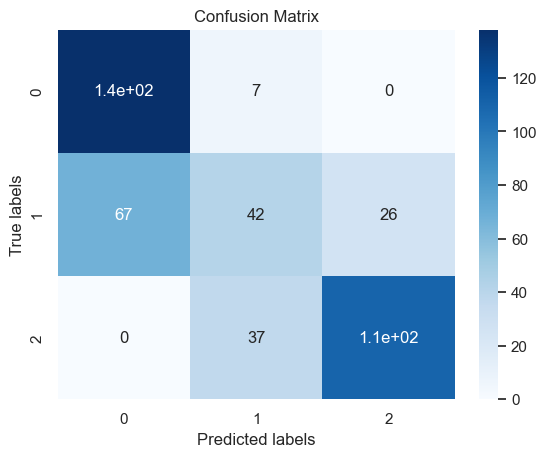

In [59]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_cor_test, gaussian_corr.predict(x_cor_test))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# SVM - Pearson Correlation

In [60]:
from sklearn import svm
support_corr = svm.LinearSVC(random_state=20)
support_corr.fit(x_cor_train, y_cor_train)

LinearSVC(random_state=20)

In [61]:
mean_accuracy=support_corr.score(x_cor_test, y_cor_test)
y_pred = support_corr.predict(x_cor_test)
print(mean_accuracy)

0.7915690866510539


In [62]:
y_pred

array([2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 0, 2,
       1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0, 0, 1, 1,
       1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 0, 2,
       2, 2, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2,
       1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1,
       1, 0, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 2,
       1, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1, 0, 0, 2,
       2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1,
       2, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0,
       2, 1, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       1, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0,

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_cor_test,y_pred))
print(classification_report(y_cor_test,y_pred))

[[120  25   0]
 [  2 109  24]
 [  0  38 109]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       145
           1       0.63      0.81      0.71       135
           2       0.82      0.74      0.78       147

    accuracy                           0.79       427
   macro avg       0.81      0.79      0.80       427
weighted avg       0.82      0.79      0.80       427



In [64]:
print ("Training Accuracy {}".format(support_corr.score(x_cor_train, y_cor_train)))
print ("Testing Accuracy {}".format(support_corr.score(x_cor_test, y_cor_test)))

Training Accuracy 0.8111436950146628
Testing Accuracy 0.7915690866510539


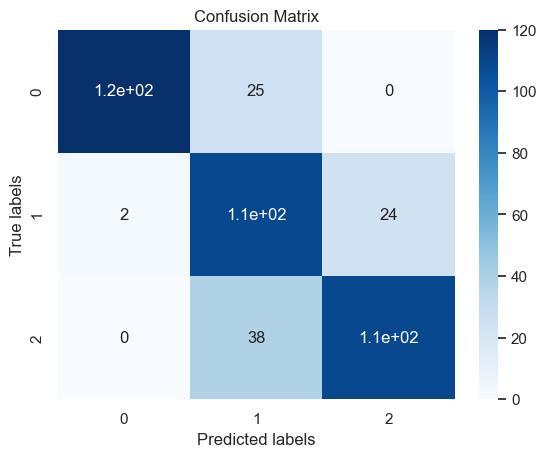

In [65]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = support_corr.predict(x_cor_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_cor_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


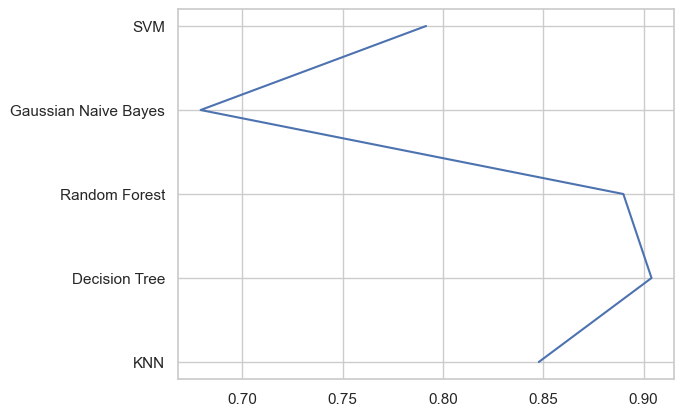

In [66]:
y=['KNN', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'SVM']
x = [knn_corr.score(x_cor_test, y_cor_test), decisiontree_corr.score(x_cor_test, y_cor_test), randomforest_corr.score(x_cor_test, y_cor_test), gaussian_corr.score(x_cor_test, y_cor_test), support_corr.score(x_cor_test, y_cor_test)]
plt.plot(x,y)

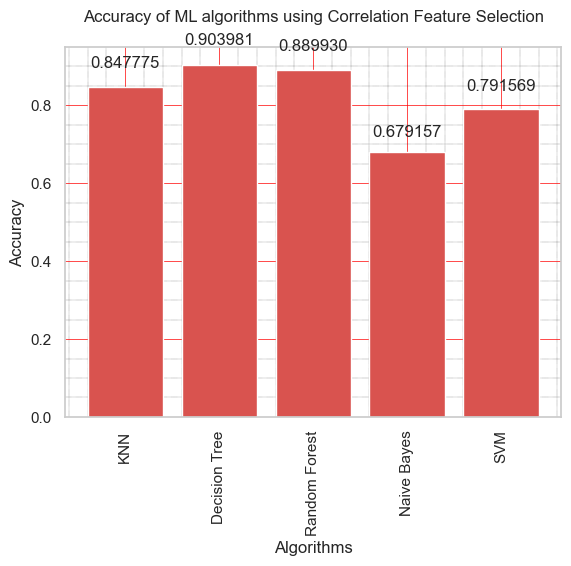

In [67]:
import matplotlib.pyplot as plt
x = ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
y = [knn_corr.score(x_cor_test, y_cor_test), decisiontree_corr.score(x_cor_test, y_cor_test), randomforest_corr.score(x_cor_test, y_cor_test), gaussian_corr.score(x_cor_test, y_cor_test), support_corr.score(x_cor_test, y_cor_test)]

x_pos = [i for i, _ in enumerate(x)]

fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, y, color='#d9534f')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of ML algorithms using Correlation Feature Selection\n")
plt.xticks(x_pos, x,rotation =90)
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

plt.show()

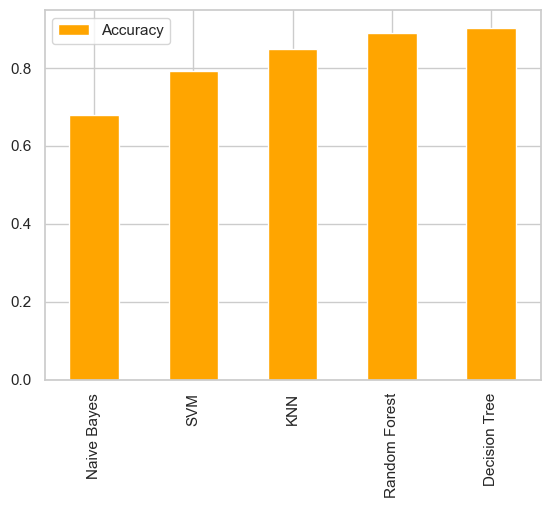

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_corr.score(x_cor_test, y_cor_test), decisiontree_corr.score(x_cor_test, y_cor_test), randomforest_corr.score(x_cor_test, y_cor_test), gaussian_corr.score(x_cor_test, y_cor_test), support_corr.score(x_cor_test, y_cor_test)]})
n=[knn_corr.score(x_cor_test, y_cor_test), decisiontree_corr.score(x_cor_test, y_cor_test), randomforest_corr.score(x_cor_test, y_cor_test), gaussian_corr.score(x_cor_test, y_cor_test), support_corr.score(x_cor_test, y_cor_test)]
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()
df.plot(kind='bar', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

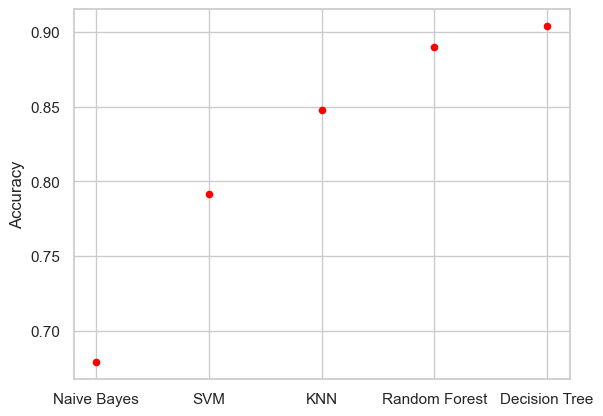

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_corr.score(x_cor_test, y_cor_test), decisiontree_corr.score(x_cor_test, y_cor_test), randomforest_corr.score(x_cor_test, y_cor_test), gaussian_corr.score(x_cor_test, y_cor_test), support_corr.score(x_cor_test, y_cor_test)]})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()
df.plot(kind='scatter', x='', y='Accuracy', ax=ax, color='red')
plt.show()

df.plot(kind='line', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

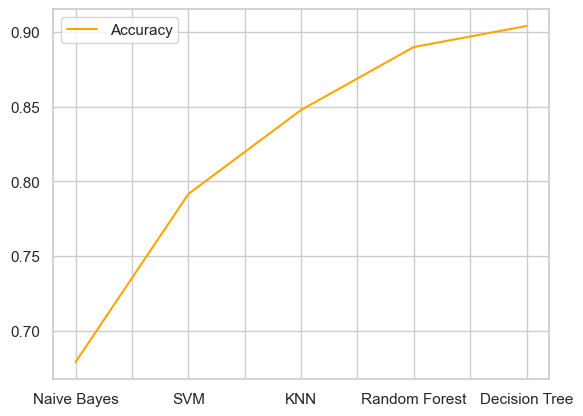

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_corr.score(x_cor_test, y_cor_test), decisiontree_corr.score(x_cor_test, y_cor_test), randomforest_corr.score(x_cor_test, y_cor_test), gaussian_corr.score(x_cor_test, y_cor_test), support_corr.score(x_cor_test, y_cor_test)]})
n=[knn_corr.score(x_cor_test, y_cor_test), decisiontree_corr.score(x_cor_test, y_cor_test), randomforest_corr.score(x_cor_test, y_cor_test), gaussian_corr.score(x_cor_test, y_cor_test), support_corr.score(x_cor_test, y_cor_test)]
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()
df.plot(kind='line', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

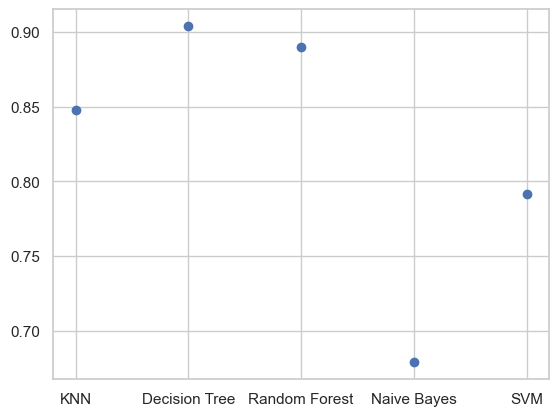

In [71]:
plt.scatter(x,y)

# KNN - Chi2

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn_chi = KNeighborsClassifier(n_neighbors=3)
knn_chi.fit(x_chi_train, y_chi_train)

KNeighborsClassifier(n_neighbors=3)

In [73]:
mean_accuracy=knn_chi.score(x_chi_test, y_chi_test)
y_pred = knn_chi.predict(x_chi_test)
print(mean_accuracy)

0.8337236533957846


In [74]:
y_pred

array([2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1,
       0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 1,
       2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 2, 0, 0, 2, 2, 1,
       0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 2,
       0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 1, 2,
       0, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 1,

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_chi_test,y_pred))
print(classification_report(y_chi_test,y_pred))

[[126   9   0]
 [ 19  97  33]
 [  0  10 133]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       135
           1       0.84      0.65      0.73       149
           2       0.80      0.93      0.86       143

    accuracy                           0.83       427
   macro avg       0.84      0.84      0.83       427
weighted avg       0.83      0.83      0.83       427



In [76]:
print ("Training Accuracy {}".format(knn_chi.score(x_chi_train, y_chi_train)))
print ("Testing Accuracy {}".format(knn_chi.score(x_chi_test, y_chi_test)))

Training Accuracy 0.9196480938416423
Testing Accuracy 0.8337236533957846


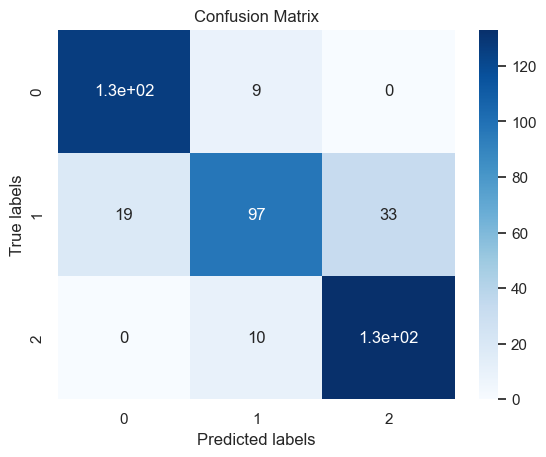

In [77]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = knn_chi.predict(x_chi_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_chi_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Decision Tree - Chi2

In [78]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_chi = DecisionTreeClassifier(random_state=0)
decisiontree_chi.fit(x_chi_train, y_chi_train)

DecisionTreeClassifier(random_state=0)

In [79]:
mean_accuracy=decisiontree_chi.score(x_chi_test, y_chi_test)
y_pred = decisiontree_chi.predict(x_chi_test)
print(mean_accuracy)

0.9601873536299765


In [80]:
y_pred

array([2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0,
       0, 2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 1,
       0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 1,
       2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2,
       0, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 2,
       0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2,
       1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 1,

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_chi_test,y_pred))
print(classification_report(y_chi_test,y_pred))

[[131   4   0]
 [  4 140   5]
 [  0   4 139]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       135
           1       0.95      0.94      0.94       149
           2       0.97      0.97      0.97       143

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



In [82]:
print ("Training Accuracy {}".format(decisiontree_chi.score(x_chi_train, y_chi_train)))
print ("Testing Accuracy {}".format(decisiontree_chi.score(x_chi_test, y_chi_test)))

Training Accuracy 1.0
Testing Accuracy 0.9601873536299765


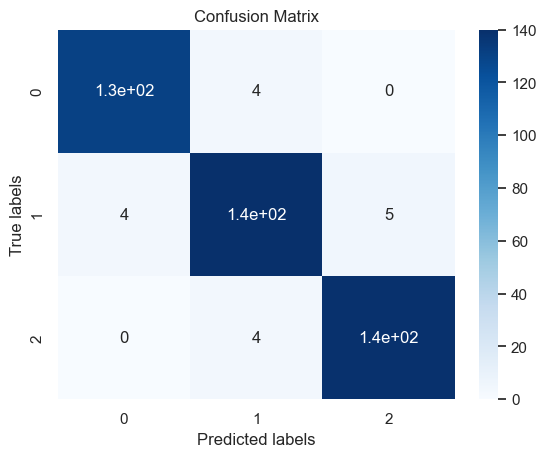

In [83]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = decisiontree_chi.predict(x_chi_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_chi_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Random Forest - Chi2

In [84]:
from sklearn.ensemble import RandomForestClassifier
randomforest_chi = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
randomforest_chi.fit(x_chi_train, y_chi_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [85]:
mean_accuracy=randomforest_chi.score(x_chi_test, y_chi_test)
y_pred = randomforest_chi.predict(x_chi_test)
print(mean_accuracy)

0.892271662763466


In [86]:
y_pred

array([2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1,
       1, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0,
       1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 1,
       2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2,
       0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 2,
       0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1,
       0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2,
       0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 1,

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_chi_test,y_pred))
print(classification_report(y_chi_test,y_pred))

[[122  13   0]
 [  1 117  31]
 [  0   1 142]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.95       135
           1       0.89      0.79      0.84       149
           2       0.82      0.99      0.90       143

    accuracy                           0.89       427
   macro avg       0.90      0.89      0.89       427
weighted avg       0.90      0.89      0.89       427



In [88]:
print ("Training Accuracy {}".format(randomforest_chi.score(x_chi_train, y_chi_train)))
print ("Testing Accuracy {}".format(randomforest_chi.score(x_chi_test, y_chi_test)))

Training Accuracy 0.9020527859237537
Testing Accuracy 0.892271662763466


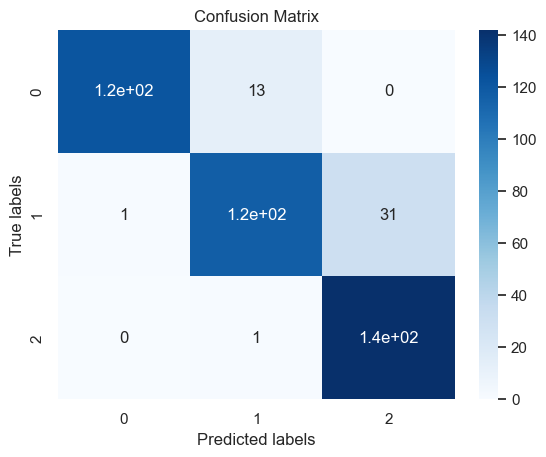

In [89]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = randomforest_chi.predict(x_chi_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_chi_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Gaussian Naive Bayes - Chi2

In [90]:
from sklearn.naive_bayes import GaussianNB
gaussian_chi = GaussianNB()
gaussian_chi.fit(x_chi_train, y_chi_train)

GaussianNB()

In [91]:
mean_accuracy=gaussian_chi.score(x_chi_test, y_chi_test)
y_pred = gaussian_chi.predict(x_chi_test)
print(mean_accuracy)

0.6721311475409836


In [92]:
y_pred

array([2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 0,
       0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1,
       1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 1, 2, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2,
       0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1,
       0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2,
       0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 1,

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_chi_test,y_pred))
print(classification_report(y_chi_test,y_pred))

[[126   9   0]
 [ 67  52  30]
 [  0  34 109]]
              precision    recall  f1-score   support

           0       0.65      0.93      0.77       135
           1       0.55      0.35      0.43       149
           2       0.78      0.76      0.77       143

    accuracy                           0.67       427
   macro avg       0.66      0.68      0.66       427
weighted avg       0.66      0.67      0.65       427



In [94]:
print ("Training Accuracy {}".format(gaussian_chi.score(x_chi_train, y_chi_train)))
print ("Testing Accuracy {}".format(gaussian_chi.score(x_chi_test, y_chi_test)))

Training Accuracy 0.6844574780058651
Testing Accuracy 0.6721311475409836


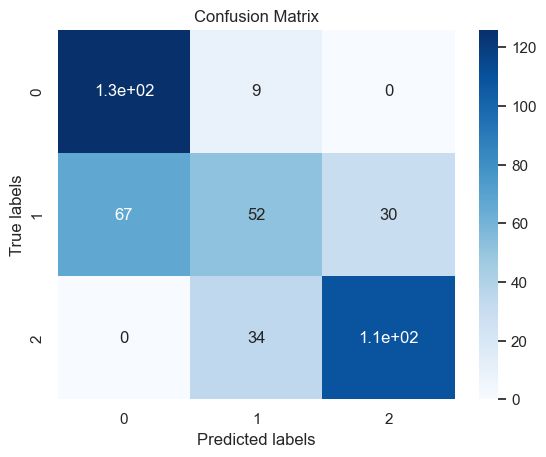

In [95]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = gaussian_chi.predict(x_chi_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_chi_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# SVM - Chi2

In [96]:
from sklearn import svm
support_chi = svm.LinearSVC(random_state=20)
support_chi.fit(x_chi_train, y_chi_train)

LinearSVC(random_state=20)

In [97]:
mean_accuracy=support_chi.score(x_chi_test, y_chi_test)
y_pred = support_chi.predict(x_chi_test)
print(mean_accuracy)

0.8220140515222483


In [98]:
y_pred

array([2, 2, 1, 0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 0,
       0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1,
       0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0,
       1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 1,
       2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2,
       0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2,
       0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 2, 1,

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_chi_test,y_pred))
print(classification_report(y_chi_test,y_pred))

[[124  10   1]
 [  2 109  38]
 [  0  25 118]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       135
           1       0.76      0.73      0.74       149
           2       0.75      0.83      0.79       143

    accuracy                           0.82       427
   macro avg       0.83      0.83      0.83       427
weighted avg       0.83      0.82      0.82       427



In [100]:
print ("Training Accuracy {}".format(support_chi.score(x_chi_train, y_chi_train)))
print ("Testing Accuracy {}".format(support_chi.score(x_chi_test, y_chi_test)))

Training Accuracy 0.8457478005865102
Testing Accuracy 0.8220140515222483


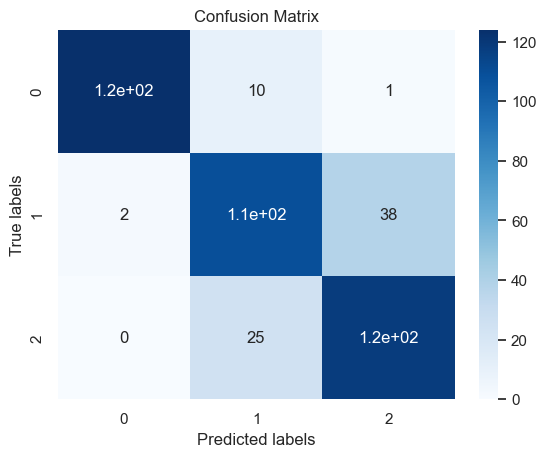

In [101]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = support_chi.predict(x_chi_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_chi_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


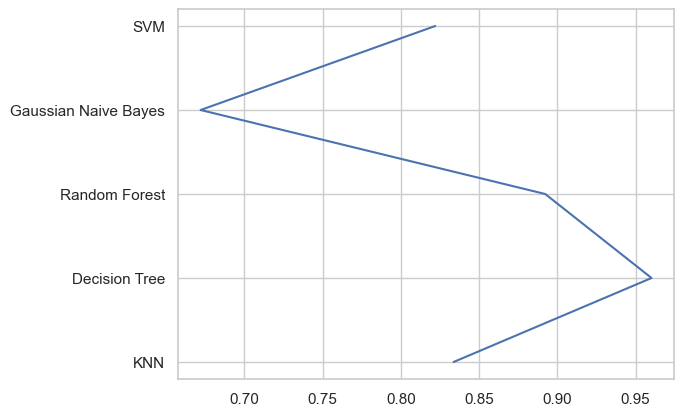

In [102]:
y=['KNN', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'SVM']
x = [knn_chi.score(x_chi_test, y_chi_test), decisiontree_chi.score(x_chi_test, y_chi_test), randomforest_chi.score(x_chi_test, y_chi_test), gaussian_chi.score(x_chi_test, y_chi_test), support_chi.score(x_chi_test, y_chi_test)]
plt.plot(x,y)

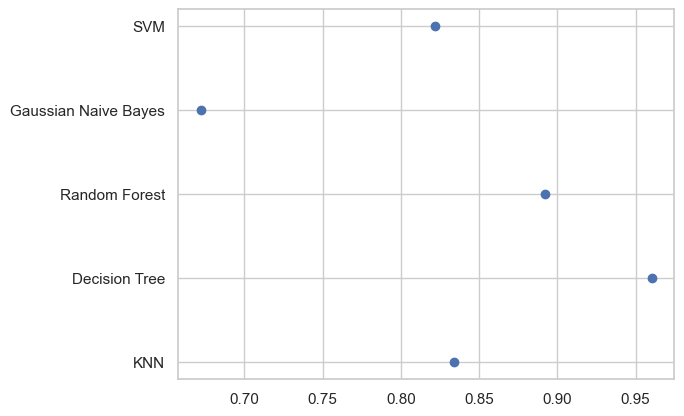

In [103]:
plt.scatter(x,y)

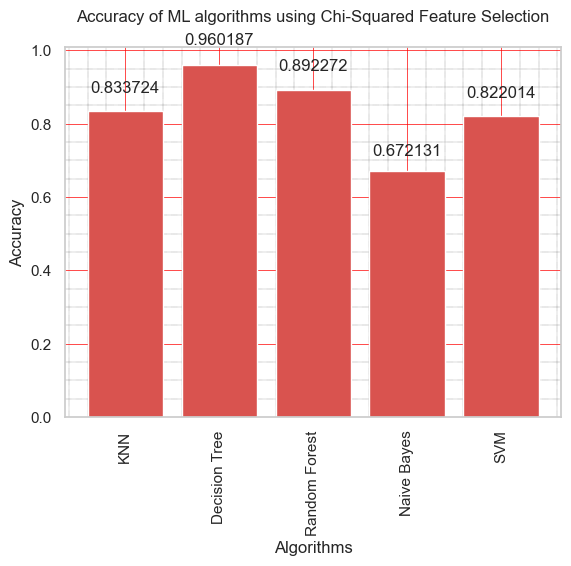

In [104]:
import matplotlib.pyplot as plt
x=['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
y = [knn_chi.score(x_chi_test, y_chi_test), decisiontree_chi.score(x_chi_test, y_chi_test), randomforest_chi.score(x_chi_test, y_chi_test), gaussian_chi.score(x_chi_test, y_chi_test), support_chi.score(x_chi_test, y_chi_test)]

x_pos = [i for i, _ in enumerate(x)]

fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, y, color='#d9534f')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of ML algorithms using Chi-Squared Feature Selection\n")
plt.xticks(x_pos, x,rotation =90)
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

plt.show()

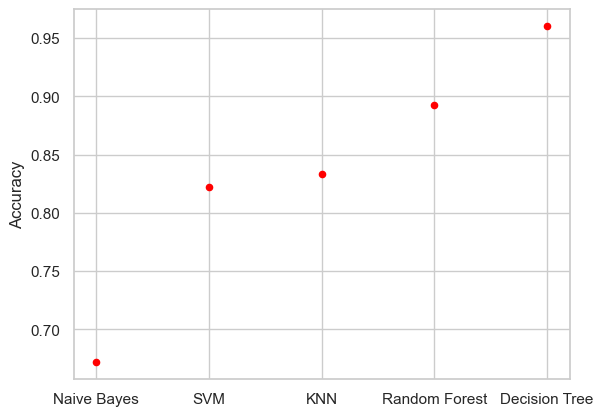

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_chi.score(x_chi_test, y_chi_test), decisiontree_chi.score(x_chi_test, y_chi_test), randomforest_chi.score(x_chi_test, y_chi_test), gaussian_chi.score(x_chi_test, y_chi_test), support_chi.score(x_chi_test, y_chi_test)]
})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()
df.plot(kind='scatter', x='', y='Accuracy', ax=ax, color='red')
plt.show()

df.plot(kind='line', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

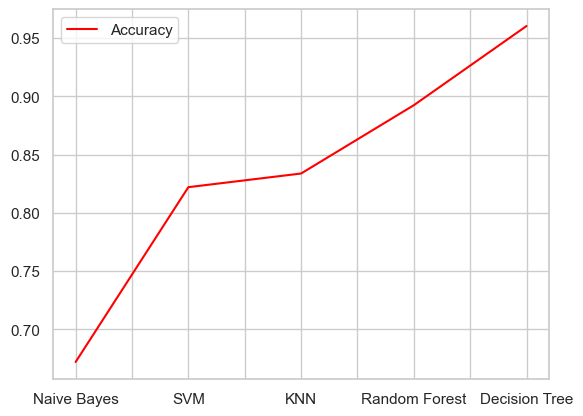

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_chi.score(x_chi_test, y_chi_test), decisiontree_chi.score(x_chi_test, y_chi_test), randomforest_chi.score(x_chi_test, y_chi_test), gaussian_chi.score(x_chi_test, y_chi_test), support_chi.score(x_chi_test, y_chi_test)]
})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()
df.plot(kind='line', x='', y='Accuracy', ax=ax, color='red')
plt.show()

df.plot(kind='line', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

# KNN - RFE

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn_rfe = KNeighborsClassifier(n_neighbors=3)
knn_rfe.fit(x_rfe_train, y_rfe_train)

KNeighborsClassifier(n_neighbors=3)

In [108]:
mean_accuracy=knn_rfe.score(x_rfe_test, y_rfe_test)
y_pred = knn_rfe.predict(x_rfe_test)
print(mean_accuracy)

0.8665105386416861


In [109]:
y_pred

array([0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0,
       0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 2, 2,
       0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0,
       0, 2, 1, 0, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2,
       1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1,
       1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0,
       1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1,
       0, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1,
       1, 0, 0, 2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2,
       0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1,

In [110]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rfe_test,y_pred))
print(classification_report(y_rfe_test,y_pred))

[[129   8   0]
 [ 16 107  27]
 [  0   6 134]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       137
           1       0.88      0.71      0.79       150
           2       0.83      0.96      0.89       140

    accuracy                           0.87       427
   macro avg       0.87      0.87      0.86       427
weighted avg       0.87      0.87      0.86       427



In [111]:
print ("Training Accuracy {}".format(knn_rfe.score(x_rfe_train, y_rfe_train)))
print ("Testing Accuracy {}".format(knn_rfe.score(x_rfe_test, y_rfe_test)))

Training Accuracy 0.9331378299120234
Testing Accuracy 0.8665105386416861


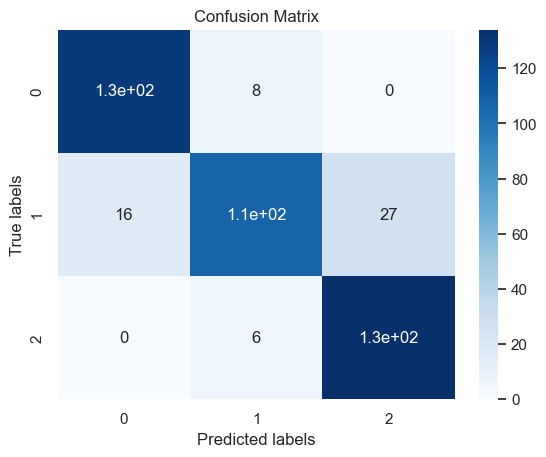

In [112]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = knn_rfe.predict(x_rfe_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_rfe_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# DecisionTree - RFE

In [113]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_rfe = DecisionTreeClassifier(random_state=0)
decisiontree_rfe.fit(x_rfe_train, y_rfe_train)

DecisionTreeClassifier(random_state=0)

In [114]:
mean_accuracy=decisiontree_rfe.score(x_rfe_test, y_rfe_test)
y_pred = decisiontree_rfe.predict(x_rfe_test)
print(mean_accuracy)

0.9672131147540983


In [115]:
y_pred

array([0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0,
       1, 2, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2,
       0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 0,
       0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1,
       1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1,
       0, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1,
       1, 0, 0, 2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2,
       0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1,

In [116]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rfe_test,y_pred))
print(classification_report(y_rfe_test,y_pred))

[[136   0   1]
 [  1 142   7]
 [  0   5 135]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       137
           1       0.97      0.95      0.96       150
           2       0.94      0.96      0.95       140

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427



In [117]:
print ("Training Accuracy {}".format(decisiontree_rfe.score(x_rfe_train, y_rfe_train)))
print ("Testing Accuracy {}".format(decisiontree_rfe.score(x_rfe_test, y_rfe_test)))

Training Accuracy 1.0
Testing Accuracy 0.9672131147540983


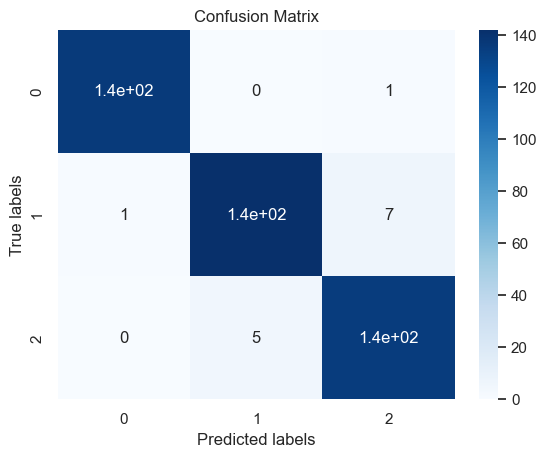

In [118]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = decisiontree_rfe.predict(x_rfe_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_rfe_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# RandomForest - RFE

In [119]:
from sklearn.ensemble import RandomForestClassifier
randomforest_rfe = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
randomforest_rfe.fit(x_rfe_train, y_rfe_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [120]:
mean_accuracy=randomforest_rfe.score(x_rfe_test, y_rfe_test)
y_pred = randomforest_rfe.predict(x_rfe_test)
print(mean_accuracy)

0.9203747072599532


In [121]:
y_pred

array([0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0,
       1, 2, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 1, 2, 2,
       0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0,
       0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2,
       1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1,
       1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0,
       1, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1,
       0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1,
       1, 0, 0, 2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2,
       0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 0, 1,

In [122]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rfe_test,y_pred))
print(classification_report(y_rfe_test,y_pred))

[[135   2   0]
 [  1 119  30]
 [  0   1 139]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       137
           1       0.98      0.79      0.88       150
           2       0.82      0.99      0.90       140

    accuracy                           0.92       427
   macro avg       0.93      0.92      0.92       427
weighted avg       0.93      0.92      0.92       427



In [123]:
print ("Training Accuracy {}".format(randomforest_rfe.score(x_rfe_train, y_rfe_train)))
print ("Testing Accuracy {}".format(randomforest_rfe.score(x_rfe_test, y_rfe_test)))

Training Accuracy 0.9249266862170088
Testing Accuracy 0.9203747072599532


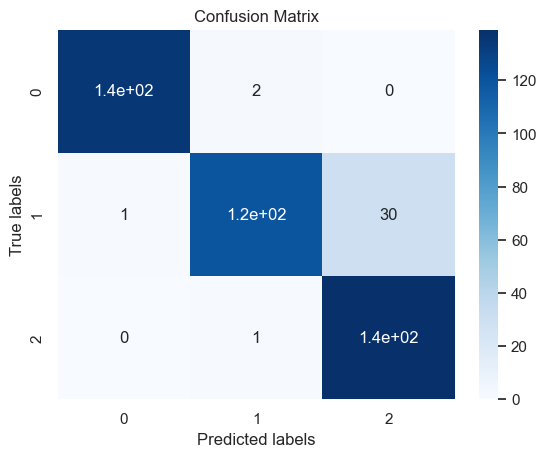

In [124]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = randomforest_rfe.predict(x_rfe_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_rfe_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Gaussian Naive Bayes - RFE

In [125]:
from sklearn.naive_bayes import GaussianNB
gaussian_rfe = GaussianNB()
gaussian_rfe.fit(x_rfe_train, y_rfe_train)

GaussianNB()

In [126]:
mean_accuracy=gaussian_rfe.score(x_rfe_test, y_rfe_test)
y_pred = gaussian_rfe.predict(x_rfe_test)
print(mean_accuracy)

0.8618266978922716


In [127]:
y_pred

array([0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0,
       0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2,
       0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 0,
       0, 2, 1, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2,
       1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2,
       1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1,
       1, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       1, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1,
       0, 0, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1,
       1, 0, 0, 2, 2, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1,

In [128]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rfe_test,y_pred))
print(classification_report(y_rfe_test,y_pred))

[[131   6   0]
 [ 20 106  24]
 [  0   9 131]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       137
           1       0.88      0.71      0.78       150
           2       0.85      0.94      0.89       140

    accuracy                           0.86       427
   macro avg       0.86      0.87      0.86       427
weighted avg       0.86      0.86      0.86       427



In [129]:
print ("Training Accuracy {}".format(gaussian_rfe.score(x_rfe_train, y_rfe_train)))
print ("Testing Accuracy {}".format(gaussian_rfe.score(x_rfe_test, y_rfe_test)))

Training Accuracy 0.8498533724340176
Testing Accuracy 0.8618266978922716


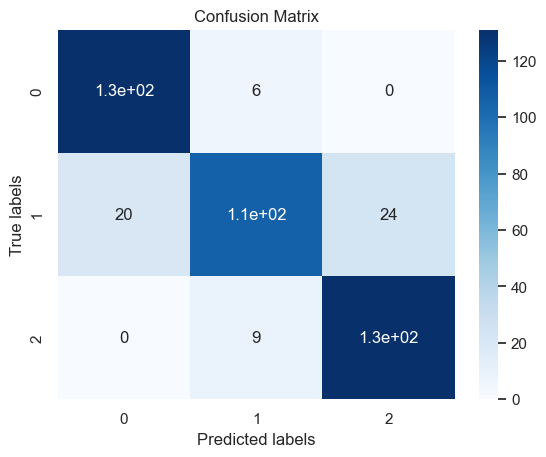

In [130]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = gaussian_rfe.predict(x_rfe_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_rfe_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# SVM - RFE

In [131]:
from sklearn import svm
support_rfe = svm.LinearSVC(random_state=20)
support_rfe.fit(x_rfe_train, y_rfe_train)

LinearSVC(random_state=20)

In [132]:
mean_accuracy=support_rfe.score(x_rfe_test, y_rfe_test)
y_pred = support_rfe.predict(x_rfe_test)
print(mean_accuracy)

0.8618266978922716


In [133]:
y_pred

array([0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0,
       1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2,
       0, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0,
       0, 2, 1, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 1, 2,
       1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2,
       1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1,
       1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       1, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1,
       0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1,
       1, 0, 0, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 1,

In [134]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rfe_test,y_pred))
print(classification_report(y_rfe_test,y_pred))

[[136   1   0]
 [  1 116  33]
 [  0  24 116]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       137
           1       0.82      0.77      0.80       150
           2       0.78      0.83      0.80       140

    accuracy                           0.86       427
   macro avg       0.86      0.86      0.86       427
weighted avg       0.86      0.86      0.86       427



In [135]:
print ("Training Accuracy {}".format(support_rfe.score(x_rfe_train, y_rfe_train)))
print ("Testing Accuracy {}".format(support_rfe.score(x_rfe_test, y_rfe_test)))

Training Accuracy 0.8791788856304985
Testing Accuracy 0.8618266978922716


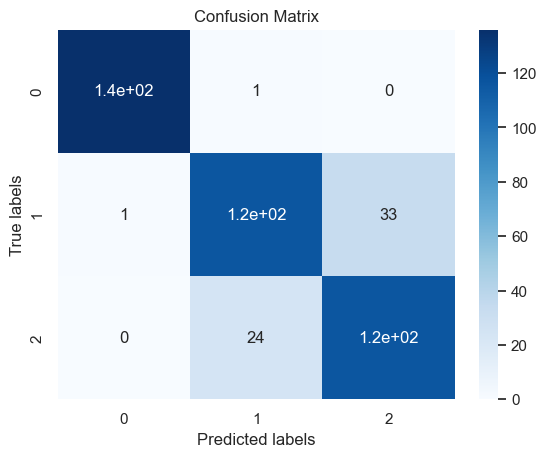

In [136]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = support_rfe.predict(x_rfe_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_rfe_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


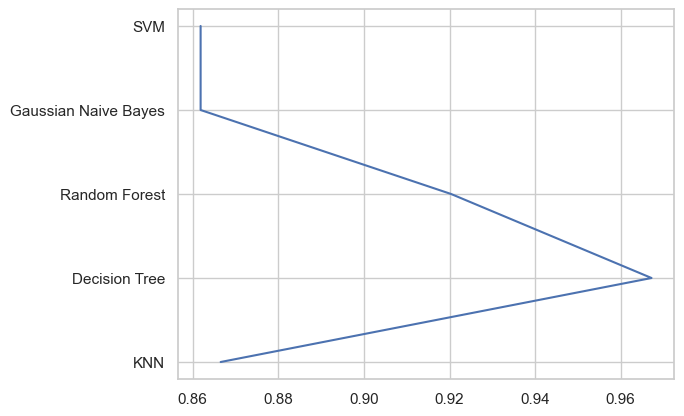

In [137]:
y=['KNN', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'SVM']
x = [knn_rfe.score(x_rfe_test, y_rfe_test), decisiontree_rfe.score(x_rfe_test, y_rfe_test), randomforest_rfe.score(x_rfe_test, y_rfe_test), gaussian_rfe.score(x_rfe_test, y_rfe_test), support_rfe.score(x_rfe_test, y_rfe_test)]
plt.plot(x,y)

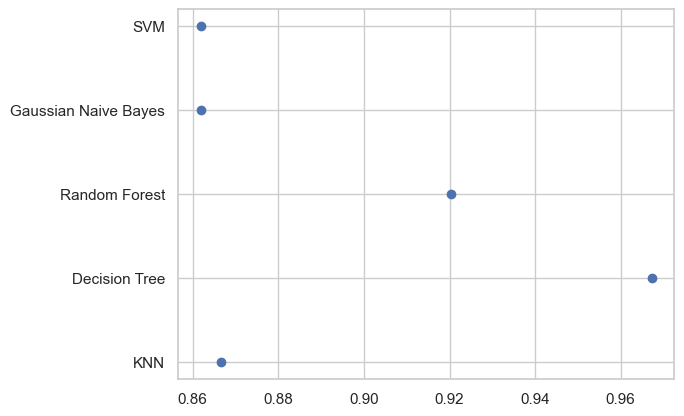

In [138]:
plt.scatter(x,y)

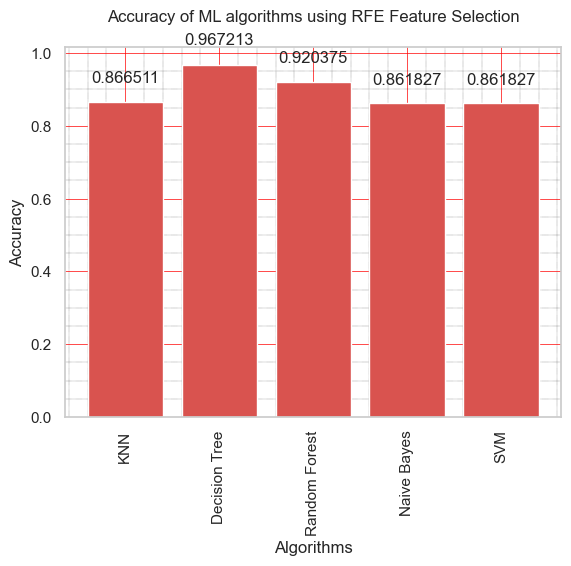

In [139]:
import matplotlib.pyplot as plt
x=['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
y = [knn_rfe.score(x_rfe_test, y_rfe_test), decisiontree_rfe.score(x_rfe_test, y_rfe_test), randomforest_rfe.score(x_rfe_test, y_rfe_test), gaussian_rfe.score(x_rfe_test, y_rfe_test), support_rfe.score(x_rfe_test, y_rfe_test)]

x_pos = [i for i, _ in enumerate(x)]

fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, y, color='#d9534f')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of ML algorithms using RFE Feature Selection\n")
plt.xticks(x_pos, x,rotation =90)
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

plt.show()

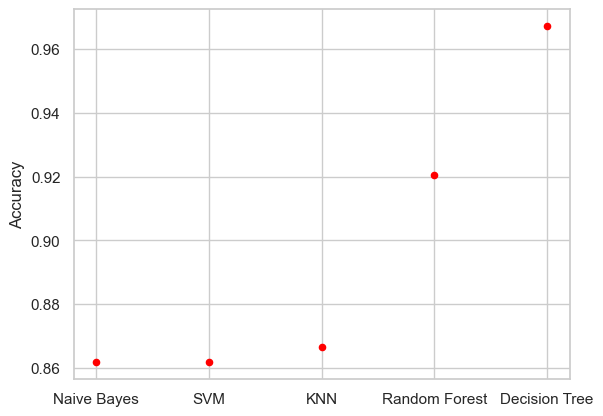

In [140]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_rfe.score(x_rfe_test, y_rfe_test), decisiontree_rfe.score(x_rfe_test, y_rfe_test), randomforest_rfe.score(x_rfe_test, y_rfe_test), gaussian_rfe.score(x_rfe_test, y_rfe_test), support_rfe.score(x_rfe_test, y_rfe_test)]})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()
df.plot(kind='scatter', x='', y='Accuracy', ax=ax, color='red')
plt.show()



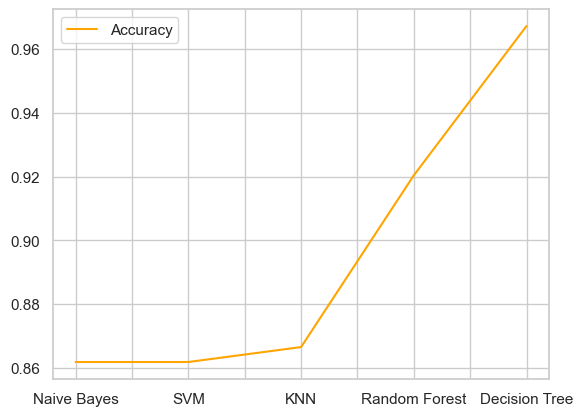

In [141]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_rfe.score(x_rfe_test, y_rfe_test), decisiontree_rfe.score(x_rfe_test, y_rfe_test), randomforest_rfe.score(x_rfe_test, y_rfe_test), gaussian_rfe.score(x_rfe_test, y_rfe_test), support_rfe.score(x_rfe_test, y_rfe_test)]})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()


df.plot(kind='line', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

# KNN - LR 

In [142]:
from sklearn.neighbors import KNeighborsClassifier
knn_lr = KNeighborsClassifier(n_neighbors=3)
knn_lr.fit(x_lr_train, y_lr_train)

KNeighborsClassifier(n_neighbors=3)

In [143]:
mean_accuracy=knn_lr.score(x_lr_test, y_lr_test)
y_pred = knn_lr.predict(x_lr_test)
print(mean_accuracy)

0.8524590163934426


In [144]:
y_pred

array([1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2,
       2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2,
       1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0,
       1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 1, 0,
       2, 1, 1, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1,
       0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 0,
       0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0,
       0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0,
       2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 2,
       0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1,

In [145]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_lr_test,y_pred))
print(classification_report(y_lr_test,y_pred))

[[130  14   0]
 [  7 107  27]
 [  0  15 127]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       144
           1       0.79      0.76      0.77       141
           2       0.82      0.89      0.86       142

    accuracy                           0.85       427
   macro avg       0.85      0.85      0.85       427
weighted avg       0.85      0.85      0.85       427



In [146]:
print ("Training Accuracy {}".format(knn_lr.score(x_lr_train, y_lr_train)))
print ("Testing Accuracy {}".format(knn_lr.score(x_lr_test, y_lr_test)))

Training Accuracy 0.9085043988269794
Testing Accuracy 0.8524590163934426


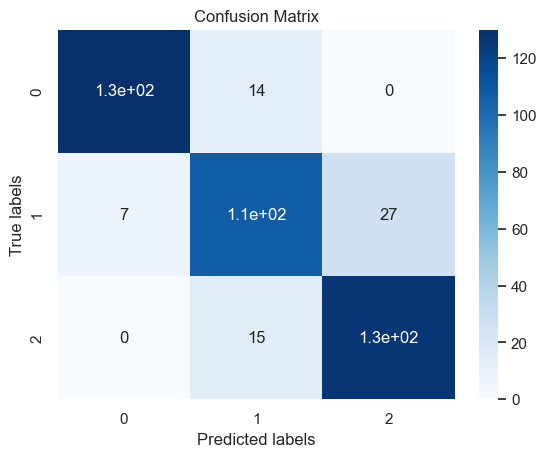

In [147]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = knn_lr.predict(x_lr_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_lr_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Decision Tree - LR

In [148]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_lr = DecisionTreeClassifier(random_state=0)
decisiontree_lr.fit(x_lr_train, y_lr_train)

DecisionTreeClassifier(random_state=0)

In [149]:
mean_accuracy=decisiontree_lr.score(x_lr_test, y_lr_test)
y_pred = decisiontree_lr.predict(x_lr_test)
print(mean_accuracy)

0.9531615925058547


In [150]:
y_pred

array([1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 1, 1, 0, 1, 0,
       2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2,
       1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0,
       1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0,
       2, 1, 1, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1,
       0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 2, 0, 0,
       0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 0,
       0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2,
       0, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1,

In [151]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_lr_test,y_pred))
print(classification_report(y_lr_test,y_pred))

[[142   2   0]
 [  4 130   7]
 [  2   5 135]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       144
           1       0.95      0.92      0.94       141
           2       0.95      0.95      0.95       142

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



In [152]:
print ("Training Accuracy {}".format(decisiontree_lr.score(x_lr_train, y_lr_train)))
print ("Testing Accuracy {}".format(decisiontree_lr.score(x_lr_test, y_lr_test)))

Training Accuracy 1.0
Testing Accuracy 0.9531615925058547


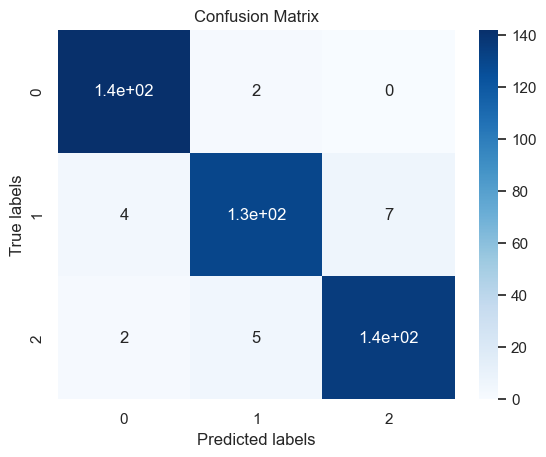

In [153]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = decisiontree_lr.predict(x_lr_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_lr_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Random Forest - LR

In [154]:
from sklearn.ensemble import RandomForestClassifier
randomforest_lr = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
randomforest_lr.fit(x_lr_train, y_lr_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [155]:
mean_accuracy=randomforest_lr.score(x_lr_test, y_lr_test)
y_pred = randomforest_lr.predict(x_lr_test)
print(mean_accuracy)

0.9250585480093677


In [156]:
y_pred

array([1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0,
       2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2,
       2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1,
       0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0,
       1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0,
       2, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1,
       0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 0, 0,
       0, 2, 1, 0, 1, 0, 0, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 0,
       0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2,
       0, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1,

In [157]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_lr_test,y_pred))
print(classification_report(y_lr_test,y_pred))

[[139   5   0]
 [  1 115  25]
 [  0   1 141]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       144
           1       0.95      0.82      0.88       141
           2       0.85      0.99      0.92       142

    accuracy                           0.93       427
   macro avg       0.93      0.92      0.92       427
weighted avg       0.93      0.93      0.92       427



In [158]:
print ("Training Accuracy {}".format(randomforest_lr.score(x_lr_train, y_lr_train)))
print ("Testing Accuracy {}".format(randomforest_lr.score(x_lr_test, y_lr_test)))

Training Accuracy 0.9302052785923753
Testing Accuracy 0.9250585480093677


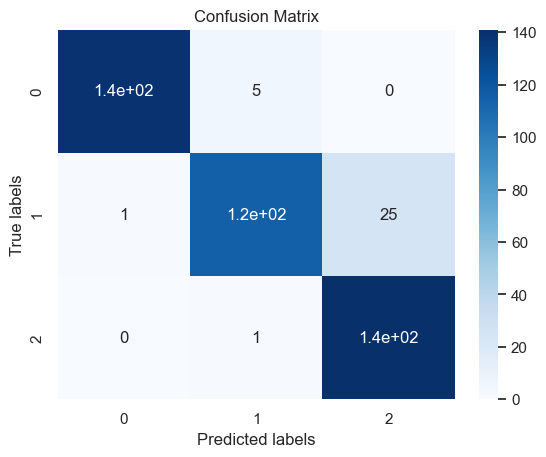

In [159]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = randomforest_lr.predict(x_lr_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_lr_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Gaussian Naive Bayes - LR

In [160]:
from sklearn.naive_bayes import GaussianNB
gaussian_lr = GaussianNB()
gaussian_lr.fit(x_lr_train, y_lr_train)

GaussianNB()

In [161]:
mean_accuracy=gaussian_lr.score(x_lr_test, y_lr_test)
y_pred = gaussian_lr.predict(x_lr_test)
print(mean_accuracy)

0.47540983606557374


In [162]:
y_pred

array([0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0,
       1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [163]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_lr_test,y_pred))
print(classification_report(y_lr_test,y_pred))

[[144   0   0]
 [103  36   2]
 [  6 113  23]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       144
           1       0.24      0.26      0.25       141
           2       0.92      0.16      0.28       142

    accuracy                           0.48       427
   macro avg       0.58      0.47      0.42       427
weighted avg       0.58      0.48      0.42       427



In [164]:
print ("Training Accuracy {}".format(gaussian_lr.score(x_lr_train, y_lr_train)))
print ("Testing Accuracy {}".format(gaussian_lr.score(x_lr_test, y_lr_test)))

Training Accuracy 0.4662756598240469
Testing Accuracy 0.47540983606557374


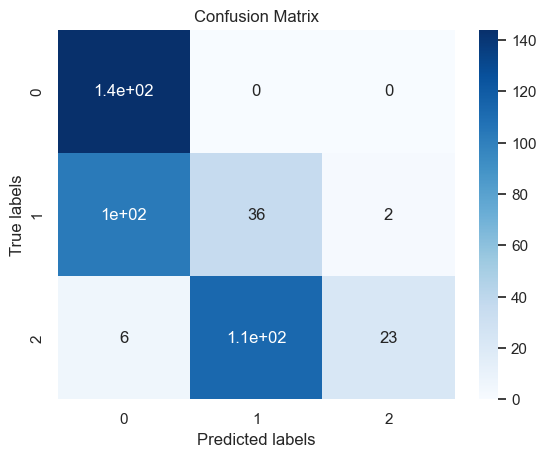

In [165]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = gaussian_lr.predict(x_lr_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_lr_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# SVM - LR

In [166]:
from sklearn import svm
support_lr = svm.LinearSVC(random_state=20)
support_lr.fit(x_lr_train, y_lr_train)

LinearSVC(random_state=20)

In [167]:
mean_accuracy=support_lr.score(x_lr_test, y_lr_test)
y_pred = support_lr.predict(x_lr_test)
print(mean_accuracy)

0.8524590163934426


In [168]:
y_pred

array([1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 0, 1,
       0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0,
       1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2,
       2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 0,
       2, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1,
       0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 0, 0,
       0, 2, 1, 0, 1, 0, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0,
       0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2,

In [169]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_lr_test,y_pred))
print(classification_report(y_lr_test,y_pred))

[[139   2   3]
 [ 11  83  47]
 [  0   0 142]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       144
           1       0.98      0.59      0.73       141
           2       0.74      1.00      0.85       142

    accuracy                           0.85       427
   macro avg       0.88      0.85      0.84       427
weighted avg       0.88      0.85      0.84       427



In [170]:
print ("Training Accuracy {}".format(support_lr.score(x_lr_train, y_lr_train)))
print ("Testing Accuracy {}".format(support_lr.score(x_lr_test, y_lr_test)))

Training Accuracy 0.8475073313782991
Testing Accuracy 0.8524590163934426


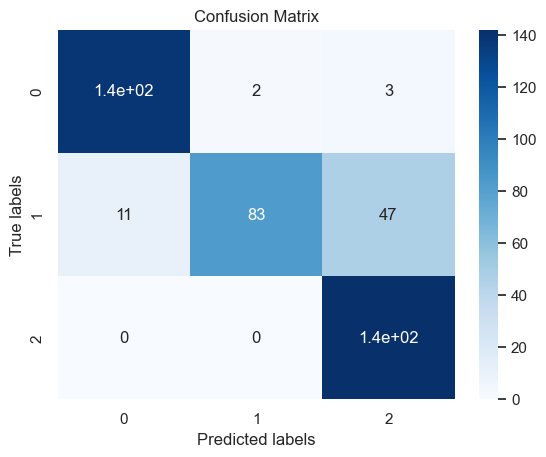

In [171]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = support_lr.predict(x_lr_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_lr_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


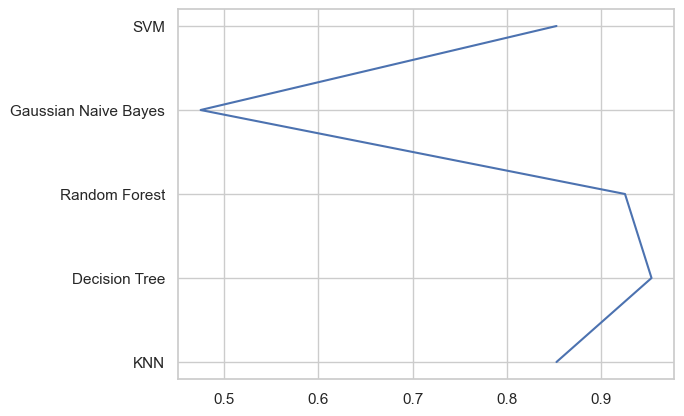

In [172]:
y=['KNN', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'SVM']
x = [knn_lr.score(x_lr_test, y_lr_test), decisiontree_lr.score(x_lr_test, y_lr_test), randomforest_lr.score(x_lr_test, y_lr_test), gaussian_lr.score(x_lr_test, y_lr_test), support_lr.score(x_lr_test, y_lr_test)]
plt.plot(x,y)

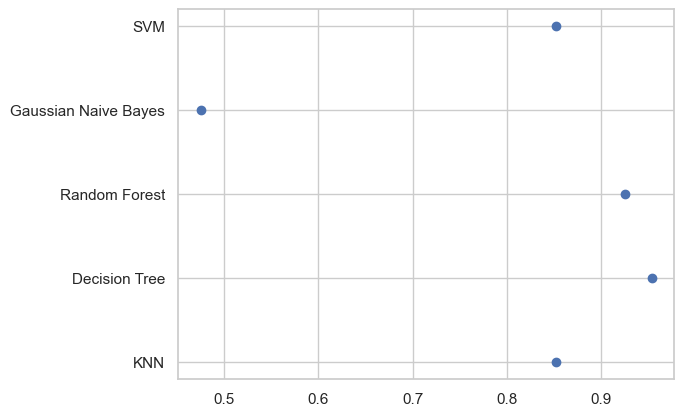

In [173]:
plt.scatter(x,y)

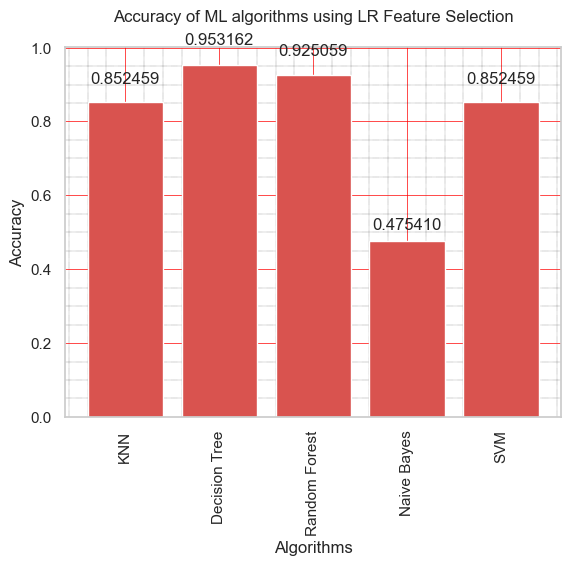

In [174]:
import matplotlib.pyplot as plt
x=['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
y = [knn_lr.score(x_lr_test, y_lr_test), decisiontree_lr.score(x_lr_test, y_lr_test), randomforest_lr.score(x_lr_test, y_lr_test), gaussian_lr.score(x_lr_test, y_lr_test), support_lr.score(x_lr_test, y_lr_test)]

x_pos = [i for i, _ in enumerate(x)]

fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, y, color='#d9534f')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of ML algorithms using LR Feature Selection\n")
plt.xticks(x_pos, x,rotation =90)
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

plt.show()

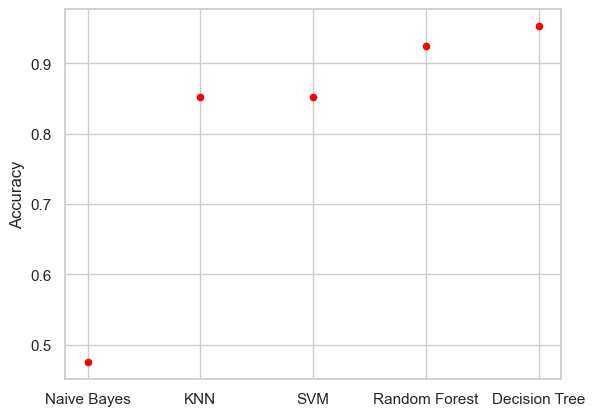

In [175]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_lr.score(x_lr_test, y_lr_test), decisiontree_lr.score(x_lr_test, y_lr_test), randomforest_lr.score(x_lr_test, y_lr_test), gaussian_lr.score(x_lr_test, y_lr_test), support_lr.score(x_lr_test, y_lr_test)]})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()
df.plot(kind='scatter', x='', y='Accuracy', ax=ax, color='red')
plt.show()



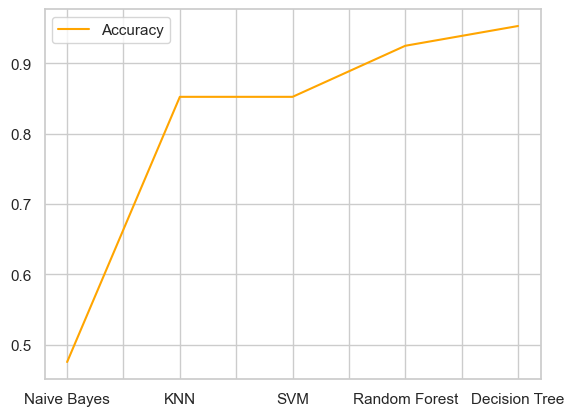

In [176]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_lr.score(x_lr_test, y_lr_test), decisiontree_lr.score(x_lr_test, y_lr_test), randomforest_lr.score(x_lr_test, y_lr_test), gaussian_lr.score(x_lr_test, y_lr_test), support_lr.score(x_lr_test, y_lr_test)]})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()


df.plot(kind='line', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

# KNN - RF

In [177]:
from sklearn.neighbors import KNeighborsClassifier
knn_rf = KNeighborsClassifier(n_neighbors=3)
knn_rf.fit(x_rf_train, y_rf_train)

KNeighborsClassifier(n_neighbors=3)

In [178]:
mean_accuracy=knn_rf.score(x_rf_test, y_rf_test)
y_pred = knn_rf.predict(x_rf_test)
print(mean_accuracy)

0.8149882903981265


In [179]:
y_pred

array([2, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0,
       1, 0, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 0, 1, 1, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 0,
       2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2,
       0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1,
       1, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0,
       1, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1,
       2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2,
       0, 2, 2, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1,
       1, 0, 2, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0,
       1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2,

In [180]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rf_test,y_pred))
print(classification_report(y_rf_test,y_pred))

[[117  18   2]
 [ 10 102  40]
 [  0   9 129]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       137
           1       0.79      0.67      0.73       152
           2       0.75      0.93      0.83       138

    accuracy                           0.81       427
   macro avg       0.82      0.82      0.82       427
weighted avg       0.82      0.81      0.81       427



In [181]:
print ("Training Accuracy {}".format(knn_rf.score(x_rf_train, y_rf_train)))
print ("Testing Accuracy {}".format(knn_rf.score(x_rf_test, y_rf_test)))

Training Accuracy 0.906158357771261
Testing Accuracy 0.8149882903981265


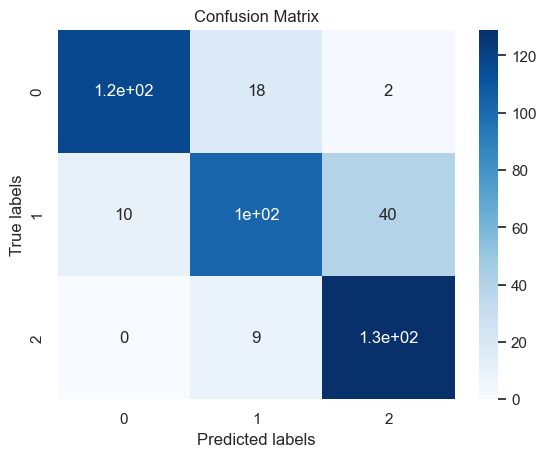

In [182]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = knn_rf.predict(x_rf_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_rf_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Decision Tree - RF

In [183]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_rf = DecisionTreeClassifier(random_state=0)
decisiontree_rf.fit(x_rf_train, y_rf_train)

DecisionTreeClassifier(random_state=0)

In [184]:
mean_accuracy=decisiontree_rf.score(x_rf_test, y_rf_test)
y_pred = decisiontree_rf.predict(x_rf_test)
print(mean_accuracy)

0.9484777517564403


In [185]:
y_pred

array([2, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0,
       2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2,
       0, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1,
       2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0,
       0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 2, 1, 1,
       1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1,

In [186]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rf_test,y_pred))
print(classification_report(y_rf_test,y_pred))

[[134   3   0]
 [  4 139   9]
 [  0   6 132]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       137
           1       0.94      0.91      0.93       152
           2       0.94      0.96      0.95       138

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



In [187]:
print ("Training Accuracy {}".format(decisiontree_rf.score(x_rf_train, y_rf_train)))
print ("Testing Accuracy {}".format(decisiontree_rf.score(x_rf_test, y_rf_test)))

Training Accuracy 1.0
Testing Accuracy 0.9484777517564403


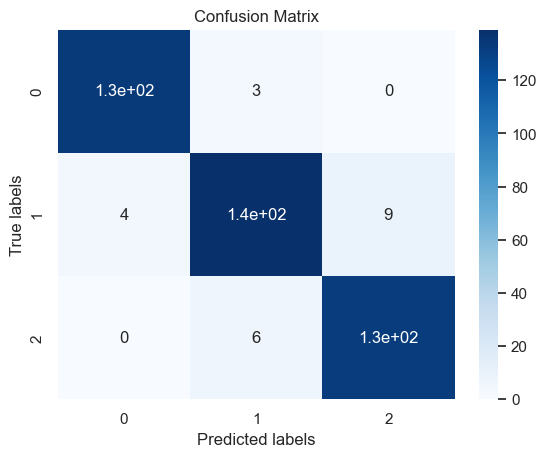

In [188]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = decisiontree_rf.predict(x_rf_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_rf_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Random Forest - RF

In [189]:
from sklearn.ensemble import RandomForestClassifier
randomforest_rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
randomforest_rf.fit(x_rf_train, y_rf_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [190]:
mean_accuracy=randomforest_rf.score(x_rf_test, y_rf_test)
y_pred = randomforest_rf.predict(x_rf_test)
print(mean_accuracy)

0.9086651053864169


In [191]:
y_pred

array([2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 0,
       2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2,
       0, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1,
       2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0,
       2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2,
       0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 0, 2, 2, 1,
       1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 0, 2, 1, 0, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1,

In [192]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rf_test,y_pred))
print(classification_report(y_rf_test,y_pred))

[[135   2   0]
 [  0 117  35]
 [  0   2 136]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       137
           1       0.97      0.77      0.86       152
           2       0.80      0.99      0.88       138

    accuracy                           0.91       427
   macro avg       0.92      0.91      0.91       427
weighted avg       0.92      0.91      0.91       427



In [193]:
print ("Training Accuracy {}".format(randomforest_rf.score(x_rf_train, y_rf_train)))
print ("Testing Accuracy {}".format(randomforest_rf.score(x_rf_test, y_rf_test)))

Training Accuracy 0.9354838709677419
Testing Accuracy 0.9086651053864169


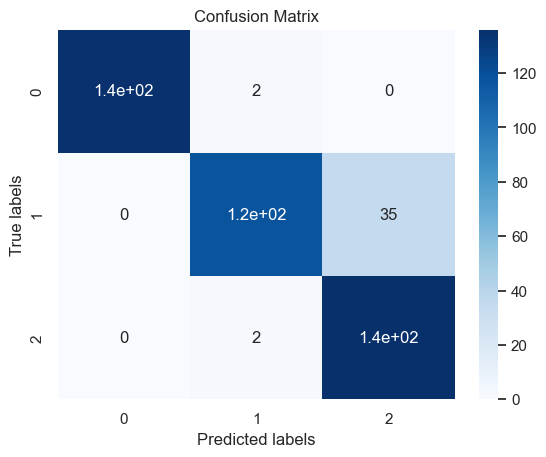

In [194]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = randomforest_rf.predict(x_rf_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_rf_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Gaussian Naive Bayes - RF

In [195]:
from sklearn.naive_bayes import GaussianNB
gaussian_rf = GaussianNB()
gaussian_rf.fit(x_rf_train, y_rf_train)

GaussianNB()

In [196]:
mean_accuracy=gaussian_rf.score(x_rf_test, y_rf_test)
y_pred = gaussian_rf.predict(x_rf_test)
print(mean_accuracy)

0.4309133489461358


In [197]:
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [198]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rf_test,y_pred))
print(classification_report(y_rf_test,y_pred))

[[137   0   0]
 [104  46   2]
 [ 30 107   1]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       137
           1       0.30      0.30      0.30       152
           2       0.33      0.01      0.01       138

    accuracy                           0.43       427
   macro avg       0.38      0.44      0.33       427
weighted avg       0.38      0.43      0.33       427



In [199]:
print ("Training Accuracy {}".format(gaussian_rf.score(x_rf_train, y_rf_train)))
print ("Testing Accuracy {}".format(gaussian_rf.score(x_rf_test, y_rf_test)))

Training Accuracy 0.4117302052785924
Testing Accuracy 0.4309133489461358


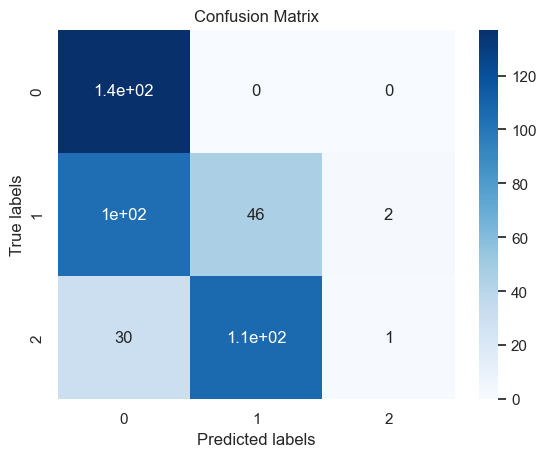

In [200]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = gaussian_rf.predict(x_rf_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_rf_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# SVM - RF

In [201]:
from sklearn import svm
support_rf = svm.LinearSVC(random_state=20)
support_rf.fit(x_rf_train, y_rf_train)

LinearSVC(random_state=20)

In [202]:
mean_accuracy=support_rf.score(x_rf_test, y_rf_test)
y_pred = support_rf.predict(x_rf_test)
print(mean_accuracy)

0.5714285714285714


In [203]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,

In [204]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_rf_test,y_pred))
print(classification_report(y_rf_test,y_pred))

[[104  32   1]
 [ 22 126   4]
 [ 44  80  14]]
              precision    recall  f1-score   support

           0       0.61      0.76      0.68       137
           1       0.53      0.83      0.65       152
           2       0.74      0.10      0.18       138

    accuracy                           0.57       427
   macro avg       0.63      0.56      0.50       427
weighted avg       0.62      0.57      0.51       427



In [205]:
print ("Training Accuracy {}".format(support_rf.score(x_rf_train, y_rf_train)))
print ("Testing Accuracy {}".format(support_rf.score(x_rf_test, y_rf_test)))

Training Accuracy 0.5442815249266862
Testing Accuracy 0.5714285714285714


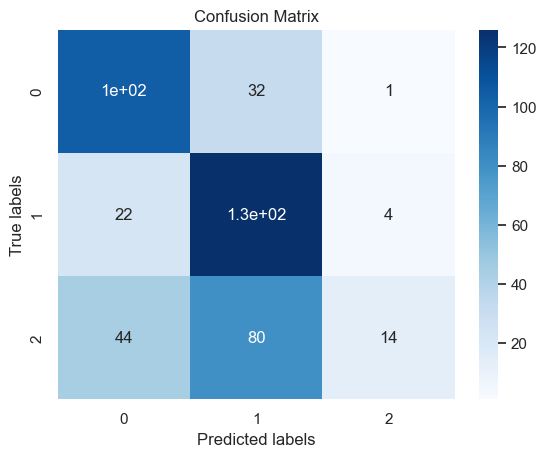

In [206]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predictions = support_rf.predict(x_rf_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_rf_test, predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


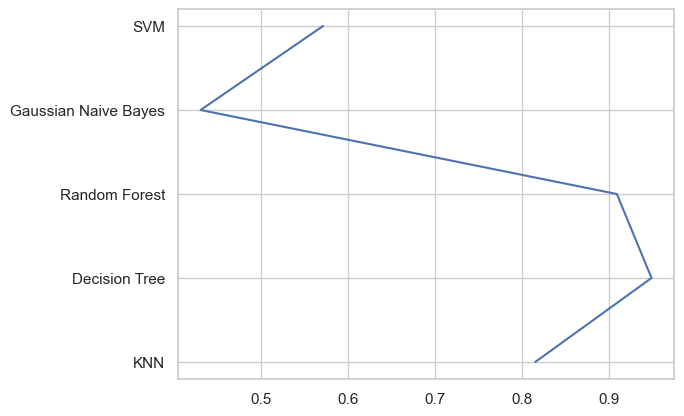

In [207]:
y=['KNN', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'SVM']
x = [knn_rf.score(x_rf_test, y_rf_test), decisiontree_rf.score(x_rf_test, y_rf_test), randomforest_rf.score(x_rf_test, y_rf_test), gaussian_rf.score(x_rf_test, y_rf_test), support_rf.score(x_rf_test, y_rf_test)]
plt.plot(x,y)

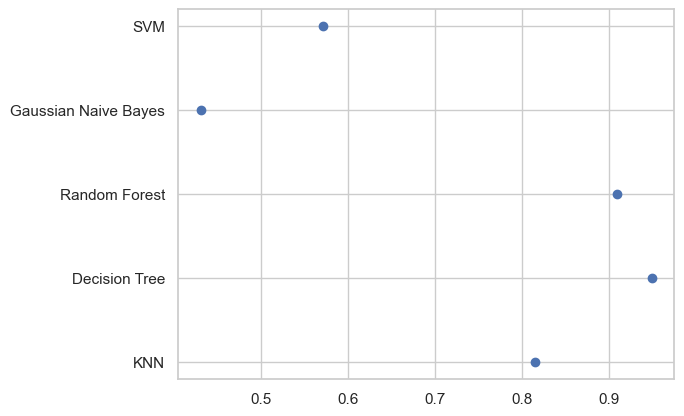

In [208]:
plt.scatter(x,y)

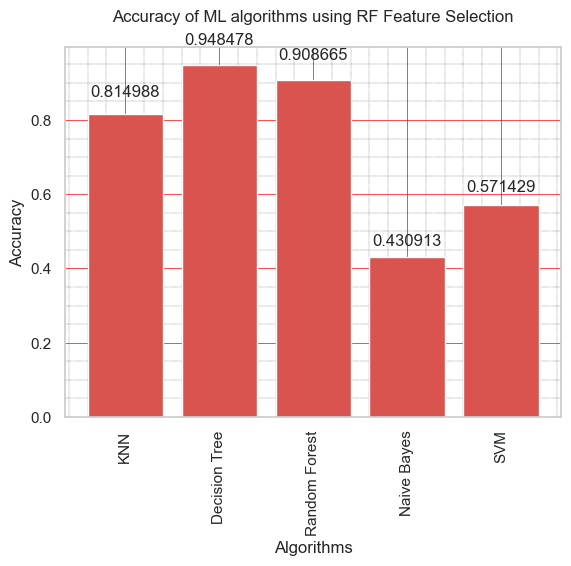

In [209]:
import matplotlib.pyplot as plt
x=['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
y = [knn_rf.score(x_rf_test, y_rf_test), decisiontree_rf.score(x_rf_test, y_rf_test), randomforest_rf.score(x_rf_test, y_rf_test), gaussian_rf.score(x_rf_test, y_rf_test), support_rf.score(x_rf_test, y_rf_test)]

x_pos = [i for i, _ in enumerate(x)]

fig, ax = plt.subplots()
rects1 = ax.bar(x_pos, y, color='#d9534f')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of ML algorithms using RF Feature Selection\n")
plt.xticks(x_pos, x,rotation =90)
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)

plt.show()

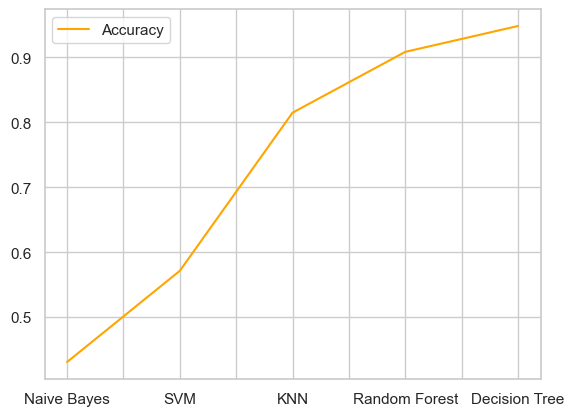

In [210]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_rf.score(x_rf_test, y_rf_test), decisiontree_rf.score(x_rf_test, y_rf_test), randomforest_rf.score(x_rf_test, y_rf_test), gaussian_rf.score(x_rf_test, y_rf_test), support_rf.score(x_rf_test, y_rf_test)]
})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()


df.plot(kind='line', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

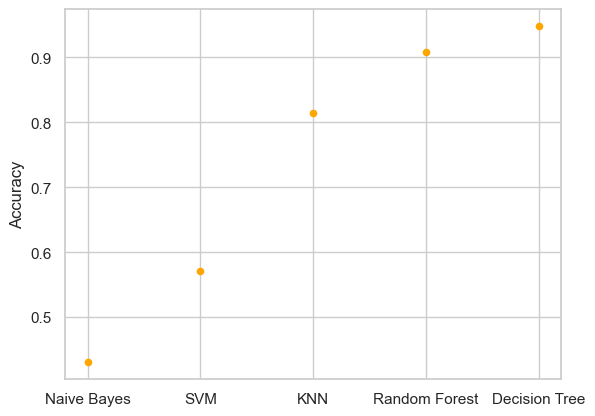

In [211]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'' : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM'],
'Accuracy' : [knn_rf.score(x_rf_test, y_rf_test), decisiontree_rf.score(x_rf_test, y_rf_test), randomforest_rf.score(x_rf_test, y_rf_test), gaussian_rf.score(x_rf_test, y_rf_test), support_rf.score(x_rf_test, y_rf_test)]
})
df = df.sort_values('Accuracy')

fig, ax = plt.subplots()


df.plot(kind='scatter', x='', y='Accuracy', ax=ax, color='orange')
plt.show()

In [212]:
print ("KNN_COR : {}".format(knn_corr.score(x_cor_test, y_cor_test)))
print ("KNN_CHI : {}".format(knn_chi.score(x_chi_test, y_chi_test)))
print ("KNN_RFE : {}".format(knn_rfe.score(x_rfe_test, y_rfe_test)))
print ("KNN_LR  : {}".format(knn_lr.score(x_lr_test, y_lr_test)))
print ("KNN_RF  : {}".format(knn_rf.score(x_rf_test, y_rf_test)))

print ("DecisionTree_COR : {}".format(decisiontree_corr.score(x_cor_test, y_cor_test)))
print ("DecisionTree_CHI : {}".format(decisiontree_chi.score(x_chi_test, y_chi_test)))
print ("DecisionTree_RFE : {}".format(decisiontree_rfe.score(x_rfe_test, y_rfe_test)))
print ("DecisionTree_LR  : {}".format(decisiontree_lr.score(x_lr_test, y_lr_test)))
print ("DecisionTree_RF  : {}".format(decisiontree_rf.score(x_rf_test, y_rf_test)))

print ("RandomForest_COR : {}".format(randomforest_corr.score(x_cor_test, y_cor_test)))
print ("RandomForest_CHI : {}".format(randomforest_chi.score(x_chi_test, y_chi_test)))
print ("RandomForest_RFE : {}".format(randomforest_rfe.score(x_rfe_test, y_rfe_test)))
print ("RandomForest_LR  : {}".format(randomforest_lr.score(x_lr_test, y_lr_test)))
print ("RandomForest_RF  : {}".format(randomforest_rf.score(x_rf_test, y_rf_test)))

print ("GaussianNaiveBayes_COR : {}".format(gaussian_corr.score(x_cor_test, y_cor_test)))
print ("GaussianNaiveBayes_CHI : {}".format(gaussian_chi.score(x_chi_test, y_chi_test)))
print ("GaussianNaiveBayes_RFE : {}".format(gaussian_rfe.score(x_rfe_test, y_rfe_test)))
print ("GaussianNaiveBayes_LR  : {}".format(gaussian_lr.score(x_lr_test, y_lr_test)))
print ("GaussianNaiveBayes_RF  : {}".format(gaussian_rf.score(x_rf_test, y_rf_test)))

print ("SVM_COR : {}".format(support_corr.score(x_cor_test, y_cor_test)))
print ("SVM_CHI : {}".format(support_chi.score(x_chi_test, y_chi_test)))
print ("SVM_RFE : {}".format(support_rfe.score(x_rfe_test, y_rfe_test)))
print ("SVM_LR  : {}".format(support_lr.score(x_lr_test, y_lr_test)))
print ("SVM_RF  : {}".format(support_rf.score(x_rf_test, y_rf_test)))

KNN_COR : 0.8477751756440282
KNN_CHI : 0.8337236533957846
KNN_RFE : 0.8665105386416861
KNN_LR  : 0.8524590163934426
KNN_RF  : 0.8149882903981265
DecisionTree_COR : 0.9039812646370023
DecisionTree_CHI : 0.9601873536299765
DecisionTree_RFE : 0.9672131147540983
DecisionTree_LR  : 0.9531615925058547
DecisionTree_RF  : 0.9484777517564403
RandomForest_COR : 0.8899297423887588
RandomForest_CHI : 0.892271662763466
RandomForest_RFE : 0.9203747072599532
RandomForest_LR  : 0.9250585480093677
RandomForest_RF  : 0.9086651053864169
GaussianNaiveBayes_COR : 0.6791569086651054
GaussianNaiveBayes_CHI : 0.6721311475409836
GaussianNaiveBayes_RFE : 0.8618266978922716
GaussianNaiveBayes_LR  : 0.47540983606557374
GaussianNaiveBayes_RF  : 0.4309133489461358
SVM_COR : 0.7915690866510539
SVM_CHI : 0.8220140515222483
SVM_RFE : 0.8618266978922716
SVM_LR  : 0.8524590163934426
SVM_RF  : 0.5714285714285714


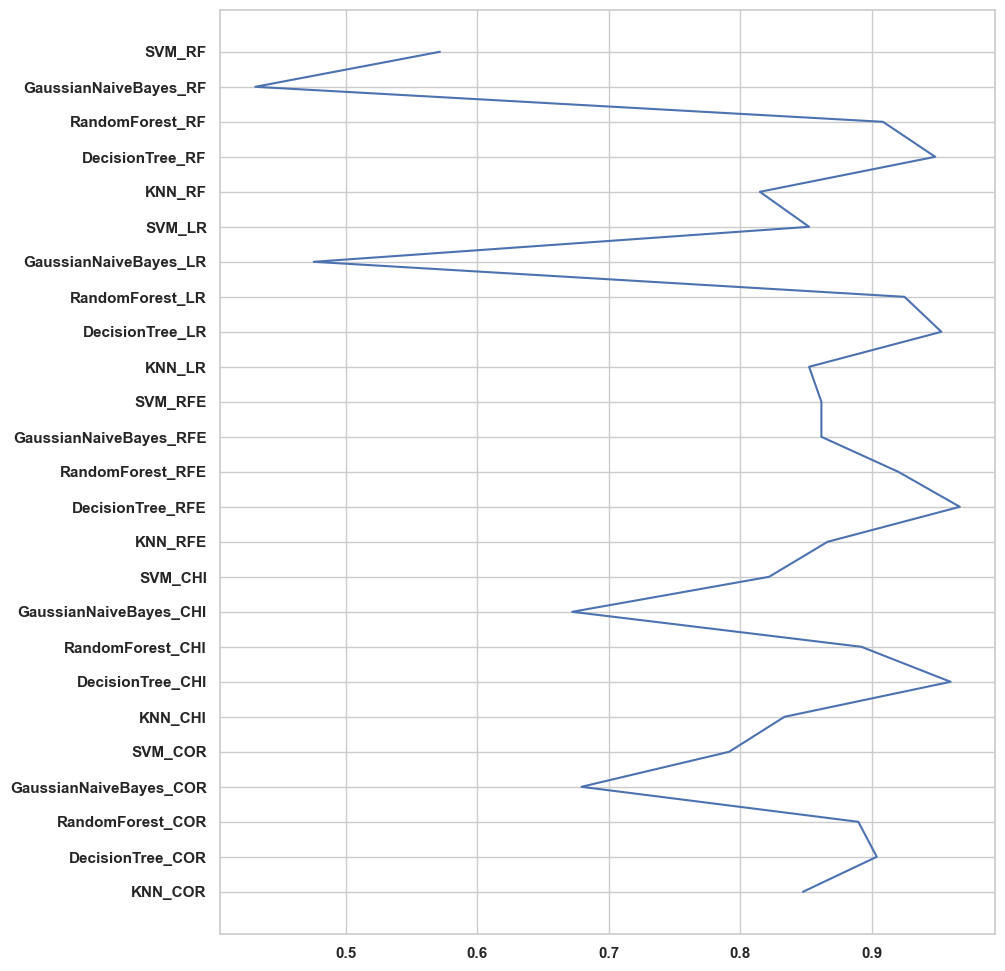

In [213]:
y=['KNN_COR', 'DecisionTree_COR', 'RandomForest_COR', 'GaussianNaiveBayes_COR', 'SVM_COR',
  'KNN_CHI', 'DecisionTree_CHI', 'RandomForest_CHI', 'GaussianNaiveBayes_CHI', 'SVM_CHI',
   'KNN_RFE', 'DecisionTree_RFE', 'RandomForest_RFE', 'GaussianNaiveBayes_RFE', 'SVM_RFE',
   'KNN_LR', 'DecisionTree_LR', 'RandomForest_LR', 'GaussianNaiveBayes_LR', 'SVM_LR',
   'KNN_RF', 'DecisionTree_RF', 'RandomForest_RF', 'GaussianNaiveBayes_RF', 'SVM_RF']
x = [knn_corr.score(x_cor_test, y_cor_test), decisiontree_corr.score(x_cor_test, y_cor_test), randomforest_corr.score(x_cor_test, y_cor_test), gaussian_corr.score(x_cor_test, y_cor_test), support_corr.score(x_cor_test, y_cor_test),
     knn_chi.score(x_chi_test, y_chi_test), decisiontree_chi.score(x_chi_test, y_chi_test), randomforest_chi.score(x_chi_test, y_chi_test), gaussian_chi.score(x_chi_test, y_chi_test), support_chi.score(x_chi_test, y_chi_test),
     knn_rfe.score(x_rfe_test, y_rfe_test), decisiontree_rfe.score(x_rfe_test, y_rfe_test), randomforest_rfe.score(x_rfe_test, y_rfe_test), gaussian_rfe.score(x_rfe_test, y_rfe_test), support_rfe.score(x_rfe_test, y_rfe_test),
knn_lr.score(x_lr_test, y_lr_test), decisiontree_lr.score(x_lr_test, y_lr_test), randomforest_lr.score(x_lr_test, y_lr_test), gaussian_lr.score(x_lr_test, y_lr_test), support_lr.score(x_lr_test, y_lr_test),
knn_rf.score(x_rf_test, y_rf_test), decisiontree_rf.score(x_rf_test, y_rf_test), randomforest_rf.score(x_rf_test, y_rf_test), gaussian_rf.score(x_rf_test, y_rf_test), support_rf.score(x_rf_test, y_rf_test)]
plt.rcParams.update({'figure.figsize':(10,12), 'font.size': 36, 'font.weight' : 'bold'})
plt.plot(x,y)

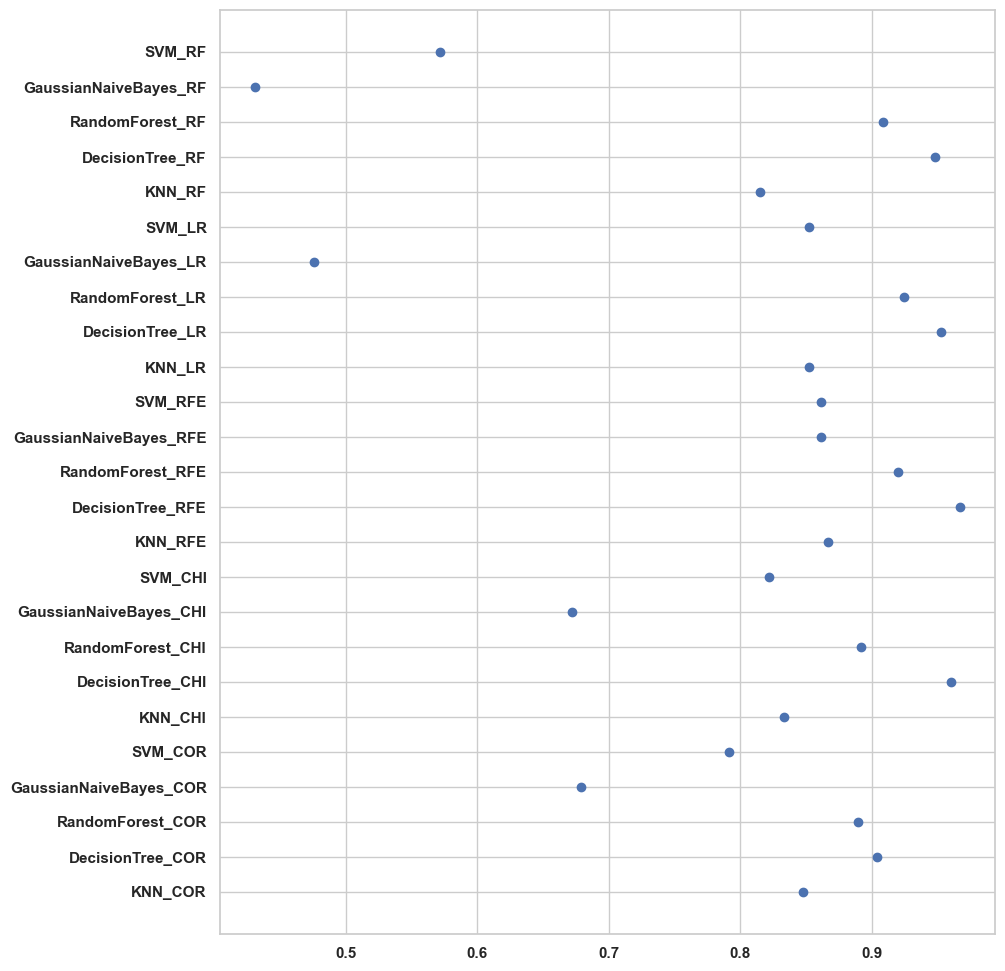

In [214]:
plt.scatter(x,y)